# Coffee

## Load Modules

In [158]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import choice
import re as re
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, f1_score, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


%matplotlib inline

## Load Dataset

In [159]:
df_orig = pd.read_csv('arabica_data_cleaned.csv')

In [160]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [161]:
df_orig.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [162]:
#clean column names
def clean_column_name(column_names):
    clean_column_names = []
    for c in column_names:
        c = c.lower()
        c = c.replace('.', '_') 
        clean_column_names.append(c)
    
    return clean_column_names

df_orig.columns = clean_column_name(df_orig.columns)

In [163]:
df_orig.head()

unnamed: 0  species                     owner country_of_origin  \
0           1  Arabica                 metad plc          Ethiopia   
1           2  Arabica                 metad plc          Ethiopia   
2           3  Arabica  grounds for health admin         Guatemala   
3           4  Arabica       yidnekachew dabessa          Ethiopia   
4           5  Arabica                 metad plc          Ethiopia   

                                  farm_name lot_number       mill ico_number  \
0                                 metad plc        NaN  metad plc  2014/2015   
1                                 metad plc        NaN  metad plc  2014/2015   
2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
4                                 metad plc        NaN  metad plc  2014/2015   

                                 company       altitude        region  \
0      metad agricultural developmet plc      1950-2200  guji-hambela   
1      metad agricultural developmet plc      1950-2200  guji-hambela   
2                                    NaN  1600 - 1800 m           NaN   
3  yidnekachew debessa coffee plantation      1800-2200        oromia   
4      metad agricultural developmet plc      1950-2200  guji-hambela   

                                producer  number_of_bags bag_weight  \
0                              METAD PLC             300      60 kg   
1                              METAD PLC             300      60 kg   
2                                    NaN               5          1   
3  Yidnekachew Dabessa Coffee Plantation             320      60 kg   
4                              METAD PLC             300      60 kg   

                   in_country_partner harvest_year      grading_date  \
0  METAD Agricultural Development plc         2014   April 4th, 2015   
1  METAD Agricultural Development plc         2014   April 4th, 2015   
2        Specialty Coffee Association          NaN    May 31st, 2010   
3  METAD Agricultural Development plc         2014  March 26th, 2015   
4  METAD Agricultural Development plc         2014   April 4th, 2015   

                    owner_1  variety processing_method   aroma  flavor  \
0                 metad plc      NaN      Washed / Wet 8.67000 8.83000   
1                 metad plc    Other      Washed / Wet 8.75000 8.67000   
2  Grounds for Health Admin  Bourbon               NaN 8.42000 8.50000   
3       Yidnekachew Dabessa      NaN     Natural / Dry 8.17000 8.58000   
4                 metad plc    Other      Washed / Wet 8.25000 8.50000   

   aftertaste  acidity    body  balance  uniformity  clean_cup  sweetness  \
0     8.67000  8.75000 8.50000  8.42000    10.00000   10.00000   10.00000   
1     8.50000  8.58000 8.42000  8.42000    10.00000   10.00000   10.00000   
2     8.42000  8.42000 8.33000  8.42000    10.00000   10.00000   10.00000   
3     8.42000  8.42000 8.50000  8.25000    10.00000   10.00000   10.00000   
4     8.25000  8.50000 8.42000  8.33000    10.00000   10.00000   10.00000   

   cupper_points  total_cup_points  moisture  category_one_defects  quakers  \
0        8.75000          90.58000   0.12000                     0  0.00000   
1        8.58000          89.92000   0.12000                     0  0.00000   
2        9.25000          89.75000   0.00000                     0  0.00000   
3        8.67000          89.00000   0.11000                     0  0.00000   
4        8.58000          88.83000   0.12000                     0  0.00000   

   color  category_two_defects        expiration  \
0  Green                     0   April 3rd, 2016   
1  Green                     1   April 3rd, 2016   
2    NaN                     0    May 31st, 2011   
3  Green                     2  March 25th, 2016   
4  Green                     2   April 3rd, 2016   

                   certification_body  \
0  METAD Agricultural Development plc   
1  METAD Agricultural De

## Overview of data

### Columns, data types, and shape

In [164]:
#show shape and number of duplicates
print('Number of rows: %d' % df_orig.shape[0])
print('Number of columns: %d' % df_orig.shape[1])
print('Number of Duplicates: {}'.format(len(df_orig[df_orig.duplicated()])))

# Show data type, number of nulls and number of unique values for each column
dtype_list = []
null_list = []
nunique_list = []

for c in df_orig.columns:
    dtype_list.append(df_orig[c].dtypes)
    null_list.append(df_orig[c].isnull().sum())
    nunique_list.append(df_orig[c].nunique())
    
summary = pd.DataFrame(list(zip(df_orig.columns, dtype_list, null_list, nunique_list)),
                         columns = ['Column', 'Data Type', 'Number of Nulls', 'Number of Unique Values'])

print('\n', summary)

Number of rows: 1311
Number of columns: 44
Number of Duplicates: 0

                    Column Data Type  Number of Nulls  Number of Unique Values
0              unnamed: 0     int64                0                     1311
1                 species    object                0                        1
2                   owner    object                7                      305
3       country_of_origin    object                1                       36
4               farm_name    object              356                      557
5              lot_number    object             1041                      221
6                    mill    object              310                      447
7              ico_number    object              146                      841
8                 company    object              209                      270
9                altitude    object              223                      383
10                 region    object               57                     

In [165]:
#unique values in each column
df_orig_obj = df_orig.select_dtypes(exclude="number")

for col in df_orig_obj.columns:
    print ('\nCategories in "%s":'%col)
    print (df_orig_obj[col].value_counts().sort_index())


Categories in "species":
Arabica    1311
Name: species, dtype: int64

Categories in "owner":
acacia hills ltd                                        1
adam ciruli ye                                          2
adam kline                                              3
adriana torres rico quevedo                             1
afca                                                   17
alejandro garcia palacios                               4
alexandra katona-carroll                                1
alfredo bojalil                                        19
almacafe                                                1
alvaro quiros perez                                     1
amanda powers                                           1
amkeni gourmet coffee group                             1
ana gonzales                                            1
andrea bernal                                           1
andreas kussmaul                                        3
andres martinez leon                

### Summary statistics

In [166]:
df_orig.describe().T

count       mean        std     min        25%  \
unnamed: 0           1311.00000  656.00076  378.59873 1.00000  328.50000   
number_of_bags       1311.00000  153.88787  129.73373 0.00000   14.50000   
aroma                1311.00000    7.56381    0.37867 0.00000    7.42000   
flavor               1311.00000    7.51807    0.39998 0.00000    7.33000   
aftertaste           1311.00000    7.39770    0.40512 0.00000    7.25000   
acidity              1311.00000    7.53311    0.38160 0.00000    7.33000   
body                 1311.00000    7.51773    0.35921 0.00000    7.33000   
balance              1311.00000    7.51751    0.40632 0.00000    7.33000   
uniformity           1311.00000    9.83339    0.55934 0.00000   10.00000   
clean_cup            1311.00000    9.83312    0.77135 0.00000   10.00000   
sweetness            1311.00000    9.90327    0.53083 0.00000   10.00000   
cupper_points        1311.00000    7.49786    0.47461 0.00000    7.25000   
total_cup_points     1311.00000   82.11593    3.51576 0.00000   81.17000   
moisture             1311.00000    0.08886    0.04796 0.00000    0.09000   
category_one_defects 1311.00000    0.42639    1.83242 0.00000    0.00000   
quakers              1310.00000    0.17710    0.84058 0.00000    0.00000   
category_two_defects 1311.00000    3.59191    5.35037 0.00000    0.00000   
altitude_low_meters  1084.00000 1759.54895 8767.84725 1.00000 1100.00000   
altitude_high_meters 1084.00000 1808.84380 8767.18750 1.00000 1100.00000   
altitude_mean_meters 1084.00000 1784.19638 8767.01691 1.00000 1100.00000   

                            50%        75%          max  
unnamed: 0            656.00000  983.50000   1312.00000  
number_of_bags        175.00000  275.00000   1062.00000  
aroma                   7.58000    7.75000      8.75000  
flavor                  7.58000    7.75000      8.83000  
aftertaste              7.42000    7.58000      8.67000  
acidity                 7.50000    7.75000      8.75000  
body                    7.50000    7.67000      8.58000  
balance                 7.50000    7.75000      8.75000  
uniformity             10.00000   10.00000     10.00000  
clean_cup              10.00000   10.00000     10.00000  
sweetness              10.00000   10.00000     10.00000  
cupper_points           7.50000    7.75000     10.00000  
total_cup_points       82.50000   83.67000     90.58000  
moisture                0.11000    0.12000      0.28000  
category_one_defects    0.00000    0.00000     31.00000  
quakers                 0.00000    0.00000     11.00000  
category_two_defects    2.00000    4.00000     55.00000  
altitude_low_meters  1310.64000 1600.00000 190164.00000  
altitude_high_meters 1350.00000 1650.00000 190164.00000  
altitude_mean_meters 1310.64000 1600.00000 190164.00000

## Data cleaning

In [167]:
df_clean = df_orig.copy()

### Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

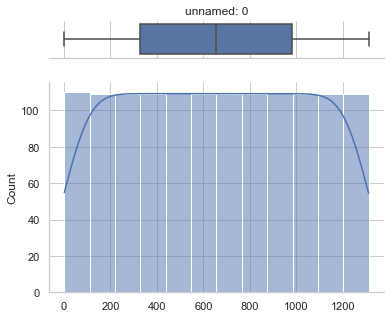

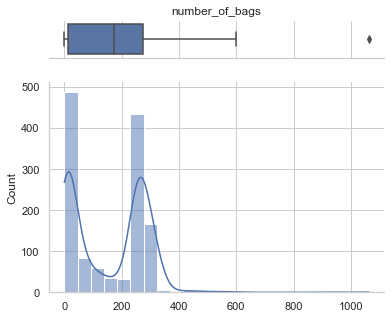

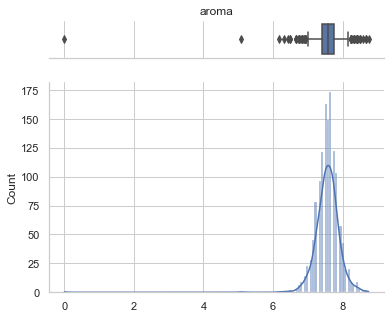

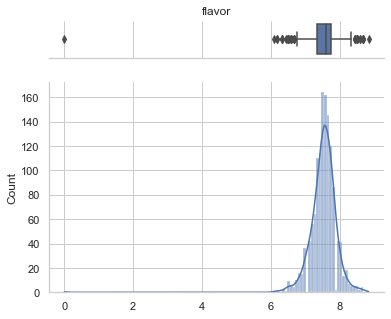

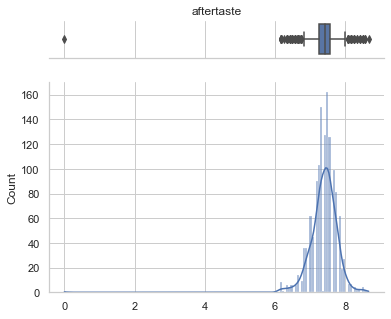

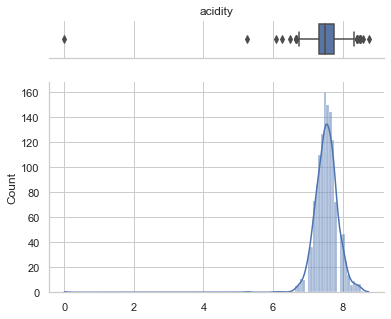

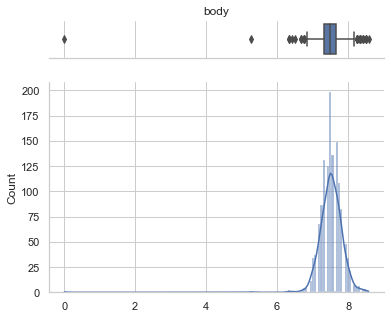

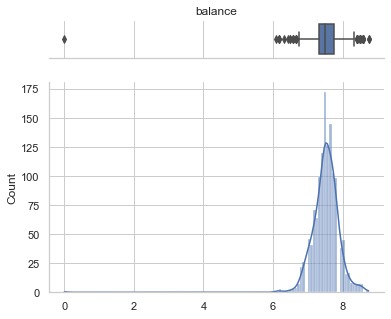

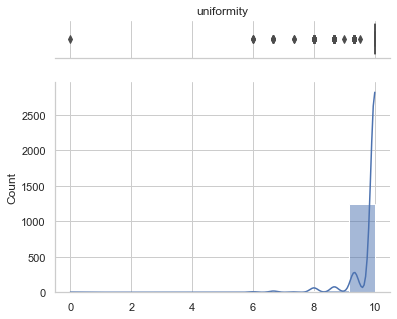

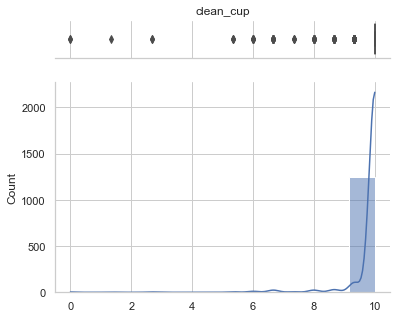

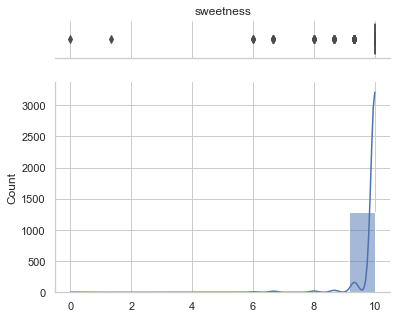

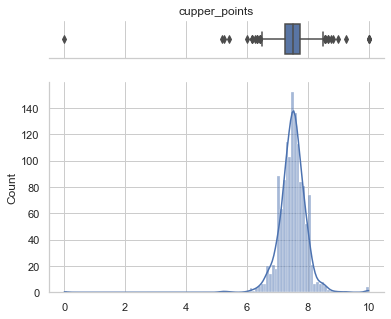

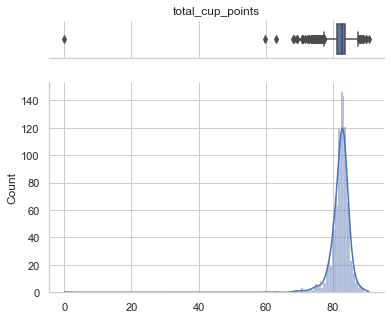

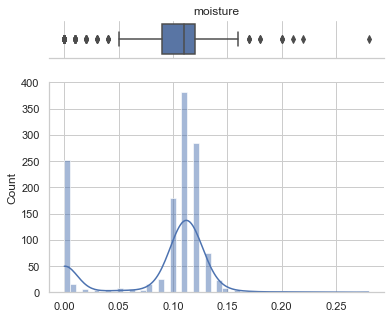

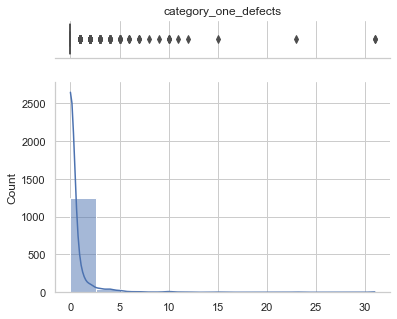

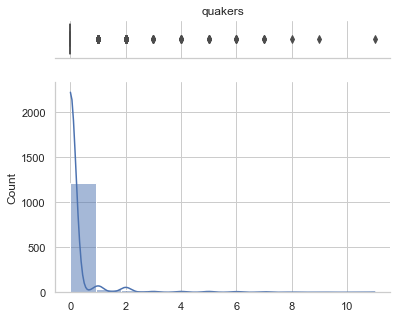

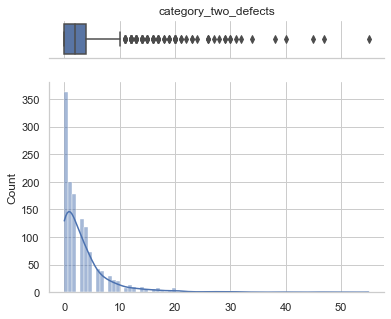

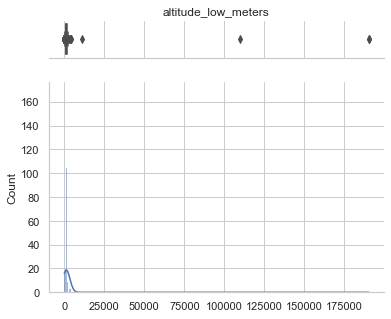

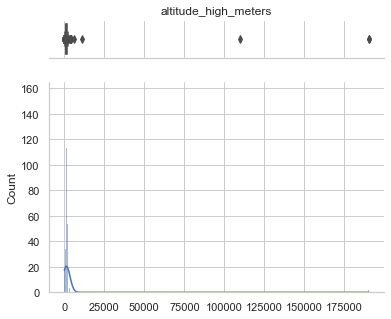

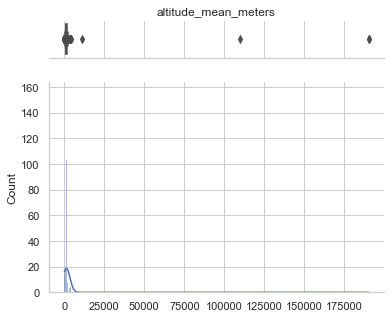

In [168]:
#Check for outliers

df_orig_num = df_orig.select_dtypes(include = ['float64', 'int64'])


for c in df_orig_num.columns: 
    fig, ax = plt.subplots(2, figsize=(6,5), sharex=True, gridspec_kw = {'height_ratios': (0.15, 0.85)})
    ax_box = ax[0]
    ax_box = sns.boxplot(x=df_orig_num[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.histplot(x=df_orig_num[c], ax=ax_hist, kde=True)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show

#### Mean altitude 1m

In [169]:
#review rows where mean altitude is 1m
df_clean[df_clean['altitude_mean_meters']== 1.000]

unnamed: 0  species            owner country_of_origin  farm_name  \
100         101  Arabica    simon mahinda             Kenya        NaN   
279         280  Arabica  ipanema coffees            Brazil  rio verde   
481         482  Arabica  ipanema coffees            Brazil  rio verde   
613         614  Arabica  ipanema coffees            Brazil  rio verde   
683         684  Arabica  ipanema coffees            Brazil  rio verde   
737         738  Arabica  ipanema coffees            Brazil  rio verde   
761         762  Arabica  ipanema coffees            Brazil  rio verde   
780         781  Arabica  ipanema coffees            Brazil  rio verde   
838         839  Arabica  ipanema coffees            Brazil  rio verde   
839         840  Arabica  ipanema coffees            Brazil  rio verde   
877         878  Arabica  ipanema coffees            Brazil  rio verde   
963         964  Arabica  ipanema coffees            Brazil  rio verde   

      lot_number                                mill     ico_number  \
100  CN 11462 AA                                ckcm            NaN   
279          NaN  ipanema comercial e exportadora sa  002/4177/0150   
481          NaN  ipanema comercial e exportadora sa  002/4177/0164   
613          NaN  ipanema comercial e exportadora sa  002/4177/0150   
683          NaN  ipanema comercial e exportadora sa  002/4177/0150   
737          NaN  ipanema comercial e exportadora sa  002/4177/0150   
761          NaN  ipanema comercial e exportadora sa  002/4177/0164   
780          NaN  ipanema comercial e exportadora sa  002/4177/0150   
838          NaN  ipanema comercial e exportadora sa  002/4177/0150   
839          NaN  ipanema comercial e exportadora sa  002/4177/0164   
877          NaN  ipanema comercial e exportadora sa  002/4177/0150   
963          NaN  ipanema comercial e exportadora sa  002/4177/0164   

             company altitude          region             producer  \
100     c dorman ltd       -1             NaN                  NaN   
279  ipanema coffees        1  south of minas  Ipanema Agrícola SA   
481  ipanema coffees        1  south of minas  Ipanema Agrícola SA   
613  ipanema coffees        1  south of minas  Ipanema Agrícola SA   
683  ipanema coffees        1  south of minas  Ipanema Agrícola SA   
737  ipanema coffees        1  south of minas  Ipanema Agrícola SA   
761  ipanema coffees        1  south of minas  Ipanema Agrícola SA   
780  ipanema coffees        1  south of minas  Ipanema Agrícola SA   
838  ipanema coffees        1  south of minas  Ipanema Agrícola SA   
839  ipanema coffees        1  south of minas  Ipanema Agrícola SA   
877  ipanema coffees        1  south of minas  Ipanema Agrícola SA   
963  ipanema coffees        1  south of minas  Ipanema Agrícola SA   

     number_of_bags bag_weight                   in_country_partner  \
100             170      60 kg     Kenya Coffee Traders Association   
279             320       2 kg  Brazil Specialty Coffee Association   
481             320       2 kg  Brazil Specialty Coffee Association   
613             320       2 kg  Brazil Specialty Coffee Association   
683             320       2 kg  Brazil Specialty Coffee Association   
737             180       2 kg  Brazil Specialty Coffee Association   
761             320       2 kg  Brazil Specialty Coffee Association   
780             320       2 kg  Brazil Specialty Coffee Association   
838             320       2 kg  Brazil Specialty Coffee Association   
839             300       2 kg  Brazil Specialty Coffee Association   
877             320       2 kg  Brazil Specialty Coffee Association   
963             320       2 kg  Brazil Specialty Coffee Association   

    harvest_year       grading_date          owner_1         variety  \
100         2015      May 7th, 2016    SIMON MAHINDA             NaN   
279    2015/2016  October 8th, 2015  Ipanema Coffees  Yellow Bourbon   
481    2015/2016  October 8th, 2015  Ipanema Coffees  Yellow Bourbo

In [170]:
#Replace 1m meal altitude with NaN
df_clean.loc[df_clean['altitude_mean_meters'] == 1.000, 'altitude_mean_meters'] = np.nan

#### Mean altitude < 100m

In [171]:
#review rows where mean altitude is <100m
df_clean[df_clean['altitude_mean_meters']<100]

unnamed: 0  species                          owner country_of_origin  \
41            42  Arabica       jacques pereira carneiro            Brazil   
42            43  Arabica       jacques pereira carneiro            Brazil   
785          786  Arabica                     ceca, s.a.        Costa Rica   
898          899  Arabica                     ceca, s.a.        Costa Rica   
1068        1069  Arabica       cqi taiwan icp cqi台灣合作夥伴            Taiwan   
1203        1204  Arabica  juan avenamar rodriguez funez            Mexico   

                  farm_name lot_number  \
41    pereira estate coffee        NaN   
42    pereira estate coffee        NaN   
785     cafetalera aquiares        NaN   
898     cafetalera aquiares        NaN   
1068                    王秋金          1   
1203           pico del oro        NaN   

                                                mill     ico_number  \
41                                          cocarive  002/1352/0045   
42                                          cocarive  002/1352/0045   
785                              cafetalera aquiares     5-025-0101   
898                              cafetalera aquiares   5-025-024/25   
1068                                             non            NaN   
1203  el pacayal, amatenango de la frontera, chiapas      F07016865   

                company altitude                         region  \
41                  NaN      1.2  sul de minas - carmo de minas   
42                  NaN      1.2  sul de minas - carmo de minas   
785           ceca,s.a.      1.3                      turrialba   
898           ceca,s.a.      1.3                      turrialba   
1068                王秋金       50                         taiwan   
1203  café pico de loro     12oo      amatenango de la frontera   

                           producer  number_of_bags bag_weight  \
41      Maria Rogeria Costa Pereira             300      60 kg   
42      Maria Rogeria Costa Pereira             300      60 kg   
785             Cafetalera Aquiares             150      69 kg   
898             Cafetalera Aquiares             250      69 kg   
1068                            王秋金              20       5 kg   
1203  JUAN AVENAMAR RODRIGUEZ FUNEZ             120       1 kg   

                              in_country_partner harvest_year  \
41                  Specialty Coffee Association         2010   
42                  Specialty Coffee Association         2010   
785   Specialty Coffee Association of Costa Rica         2013   
898   Specialty Coffee Association of Costa Rica         2015   
1068                Blossom Valley International         2017   
1203                                     AMECAFE         2012   

            grading_date                        owner_1         variety  \
41     January 4th, 2011       Jacques Pereira Carneiro  Yellow Bourbon   
42     January 4th, 2011       Jacques Pereira Carneiro  Yellow Bourbon   
785     March 21st, 2014                     CECA, S.A.         Caturra   
898   February 3rd, 2015                     CECA, S.A.         Caturra   
1068  December 8th, 2017       CQI Taiwan ICP CQI台灣合作夥伴           Other   
1203   August 30th, 2012  JUAN AVENAMAR RODRIGUEZ FUNEZ          Typica   

     processing_method   aroma  flavor  aftertaste  acidity    body  balance  \
41                 NaN 8.17000 7.92000     7.92000  7.75000 8.33000  8.00000   
42                 NaN 8.42000 7.92000     8.00000  7.75000 7.92000  8.00000   
785       Washed / Wet 7.58000 7.33000     7.33000  7.33000 7.50000  7.67000   
898       Washed / Wet 7.58000 7.42000     7.50000  7.17000 7.08000  7.58000   
1068     Natural / Dry 7.17000 7.17000     7.17000  7.42000 7.17000  7.25000   
1203      Washed / Wet 7.17000 6.83000     6.83000  7.25000 7.17000  6.92000   

      uniformity  clean_cup  sweetness  cupper_points  total_cup_points  \
41      10.00000   10.00000   10.00000        8.08000          86.17000   
42      10.00000   10.00000   10.00000  

In [172]:
#Replace 12 with 1200 for mean altitude
df_clean.loc[(df_clean['altitude_mean_meters'] == 12.000) & 
             ((df_clean['farm_name'] == 'pereira estate coffee') | (df_clean['farm_name'] == 'pico del oro')), 'altitude_mean_meters'] = 1200.000

In [173]:
#Replace 13 with 1300 for mean altitude
df_clean.loc[(df_clean['altitude_mean_meters'] == 13.000) & 
             (df_clean['farm_name'] == 'cafetalera aquiares'), 'altitude_mean_meters'] = 1300.000

#### Mean altitude 100-200m

In [174]:
df_clean[(df_clean['altitude_mean_meters']<200) & (df_clean['altitude_mean_meters']>=100)]

unnamed: 0  species                           owner  \
127          128  Arabica             松澤宏樹 koju matsuzawa   
435          436  Arabica  exportadora de cafe condor s.a   
442          443  Arabica            taylor winch (t) ltd   
584          585  Arabica       juan luis alvarado romero   
595          596  Arabica                   coffee export   
677          678  Arabica       juan luis alvarado romero   
833          834  Arabica       juan luis alvarado romero   
885          886  Arabica        cqi taiwan icp cqi台灣合作夥伴   
914          915  Arabica        cqi taiwan icp cqi台灣合作夥伴   
930          931  Arabica        jacques pereira carneiro   
938          939  Arabica        cqi taiwan icp cqi台灣合作夥伴   
1034        1035  Arabica                christina dusing   
1052        1053  Arabica                      ceca, s.a.   
1118        1119  Arabica        cqi taiwan icp cqi台灣合作夥伴   

                 country_of_origin                 farm_name     lot_number  \
127                          Japan                  ada farm  MCRKPBG 15/16   
435                       Colombia                       NaN            NaN   
442   Tanzania, United Republic Of                   mamsera             AA   
584                      Guatemala              la esmeralda     11/23/0369   
595                       Colombia                       NaN            NaN   
677                      Guatemala              la esmeralda     11/23/0400   
833                      Guatemala              la esmeralda     11/23/0634   
885                         Taiwan    mu he zi coffee 木盒子咖啡園            NaN   
914                         Taiwan                    谷泉咖啡莊園            NaN   
930                         Brazil                    sertao            NaN   
938                         Taiwan                  山彎有機咖啡農場            NaN   
1034                        Mexico               selva negra            NaN   
1052                    Costa Rica                    gamboa            NaN   
1118                        Taiwan  a shu she coffee 阿束社咖啡莊園            NaN   

                                 mill     ico_number  \
127                          ada farm            NaN   
435               trilladora boananza      3-68-0089   
442           rafiki (coffee) limited       033/0004   
584                  beneficio ixchel     11/23/0369   
595               trilladora mercedes     3-201-1817   
677                  beneficio ixchel     11/23/0400   
833                  beneficio ixchel     11/23/0634   
885            mu he zi coffee 木盒子咖啡園            NaN   
914                              寶島咖啡            123   
930                          cocarive  002/1352/0099   
938                              三彎農會       Taiwan台灣   
1034           ecc beneficio veracruz     1201255296   
1052  beneficio montañas del diamante     5-025-0048   
1118         a shu she coffee 阿束社咖啡莊園            NaN   

                                       company  altitude  \
127                           matsuzawa coffee       170   
435             exportadora de cafe condor s.a       175   
442           volcafe/taylorwinch tanzania ltd      16.8   
584                       unex guatemala, s.a.       518   
595                              coffee export      1.65   
677                       unex guatemala, s.a.       518   
833                       unex guatemala, s.a.       518   
885                         blossom valley宸嶧國際     150 m   
914                                       宸嶧國際  160-200m   
930   exportadora de cafés carmo de minas ltda      1.25   
938                                       宸嶧國際     110公尺   
1034                                       NaN       100   
1052                                 ceca,s.a.      1.85   
1118                        blossom valley宸嶧國際     150 m   

                         region                         producer  \
127           ada okinawa japan                   Taijiro TOKUDA   
435                       

In [175]:
df_clean.loc[(df_clean['altitude_mean_meters'] == 168.000) & 
             (df_clean['farm_name'] == 'mamsera'), 'altitude_mean_meters'] = 1680.000
df_clean.loc[(df_clean['altitude_mean_meters'] == 175.000) & 
             (df_clean['region'] == 'huila'), 'altitude_mean_meters'] = 1750.000
df_clean.loc[(df_clean['altitude_mean_meters'] == 165.000) & 
             (df_clean['region'] == 'huila'), 'altitude_mean_meters'] = 1650.000
df_clean.loc[(df_clean['altitude_mean_meters'] == 125.000) & 
             (df_clean['farm_name'] == 'sertao'), 'altitude_mean_meters'] = 1250.000
df_clean.loc[(df_clean['altitude_mean_meters'] == 185.000) & 
             (df_clean['farm_name'] == 'gamboa'), 'altitude_mean_meters'] = 1850.000

#### High altitude > 4000m

In [176]:
#review rows where high altitude is greater than 4000m
df_clean[df_clean['altitude_high_meters']>4000]

unnamed: 0  species                                       owner  \
543          544  Arabica  expocaccer coop dos cafeic do cerrado ltda   
628          629  Arabica                         george a. fernandez   
840          841  Arabica                                     u mg mg   
896          897  Arabica                   juan luis alvarado romero   
1040        1041  Arabica   comercial internacional exportadora, s.a.   
1098        1099  Arabica                                 u htun htun   
1144        1145  Arabica                   juan luis alvarado romero   

     country_of_origin                farm_name  lot_number  \
543             Brazil          fazenda pantano         NaN   
628           Colombia                la canada         NaN   
840            Myanmar                wat-ka-bu         NaN   
896          Guatemala             la esperanza  11/23/0368   
1040         Nicaragua  cafetales santa matilde         NaN   
1098           Myanmar               thein kone         NaN   
1144         Guatemala             la esperanza  11/23/0507   

                                          mill    ico_number  \
543                                        NaN           999   
628   the beneficio is designed to be ecologic          2889   
840                                        NaN   unspecified   
896                           beneficio ixchel    11/23/0368   
1040                      beneficio san carlos  017/001/1066   
1098                                       NaN   unspecified   
1144                          beneficio ixchel    11/23/0507   

                                        company           altitude  \
543                                  expocaccer       11000 metros   
628                                         NaN  1800 meters (5900   
840                                         NaN               4001   
896                        unex guatemala, s.a.             190164   
1040  comercial internacional exportadora, s.a.       1100.00 mosl   
1098                                        NaN               4287   
1144                       unex guatemala, s.a.            1901.64   

                                                 region  \
543                                             cerrado   
628   52 narino (exact location: mattituy; municipal...   
840                                           ywar ngan   
896                                       huehuetenango   
1040                                           jinotega   
1098                                          ywar ngan   
1144                                            oriente   

                                       producer  number_of_bags bag_weight  \
543                               GERSON NAIMEG             300       2 kg   
628   Mariana Cabrera Pantoja; I.D.: 27 423 625               1       1 kg   
840                                     U Mg Mg               1       2 kg   
896                      AGRICOLA EL PILAR, SA.              25      69 kg   
1040                             ROLANDO LACAYO             275      69 kg   
1098                                U Htun Htun               1       2 kg   
1144                    AGRICOLA EL PILAR, S.A.              25      69 kg   

                               in_country_partner              harvest_year  \
543           Brazil Specialty Coffee Association                 2014/2015   
628                  Specialty Coffee Association  Spring 2011 in Colombia.   
840                      Coffee Quality Institute                      2015   
896                  Asociacion Nacional Del Café                      2017   
1040  Asociación de Cafés Especiales de Nicaragua                      2015   
1098                     Coffee Quality Institute                      2014   
1144                 Asociacion Nacional Del Café                      2016   

             grading_date                                     owner_1  \
543     August 15th, 2014  Expocaccer 

In [177]:
#Replace 3850 with 1800 for mean altitude (5900 is the ft equivalent of 1800m, not the high end of the range)
df_clean.loc[(df_clean['altitude_mean_meters'] == 3850.000) & 
             (df_clean['farm_name'] == 'la canada'), 'altitude_mean_meters'] = 1800.000

#### Mean altitude > 4000m

In [178]:
#review rows where altitude is higher than 4000
df_clean[df_clean['altitude_mean_meters']>4000]

unnamed: 0  species                                       owner  \
543          544  Arabica  expocaccer coop dos cafeic do cerrado ltda   
840          841  Arabica                                     u mg mg   
896          897  Arabica                   juan luis alvarado romero   
1040        1041  Arabica   comercial internacional exportadora, s.a.   
1098        1099  Arabica                                 u htun htun   
1144        1145  Arabica                   juan luis alvarado romero   

     country_of_origin                farm_name  lot_number  \
543             Brazil          fazenda pantano         NaN   
840            Myanmar                wat-ka-bu         NaN   
896          Guatemala             la esperanza  11/23/0368   
1040         Nicaragua  cafetales santa matilde         NaN   
1098           Myanmar               thein kone         NaN   
1144         Guatemala             la esperanza  11/23/0507   

                      mill    ico_number  \
543                    NaN           999   
840                    NaN   unspecified   
896       beneficio ixchel    11/23/0368   
1040  beneficio san carlos  017/001/1066   
1098                   NaN   unspecified   
1144      beneficio ixchel    11/23/0507   

                                        company      altitude         region  \
543                                  expocaccer  11000 metros        cerrado   
840                                         NaN          4001      ywar ngan   
896                        unex guatemala, s.a.        190164  huehuetenango   
1040  comercial internacional exportadora, s.a.  1100.00 mosl       jinotega   
1098                                        NaN          4287      ywar ngan   
1144                       unex guatemala, s.a.       1901.64        oriente   

                     producer  number_of_bags bag_weight  \
543             GERSON NAIMEG             300       2 kg   
840                   U Mg Mg               1       2 kg   
896    AGRICOLA EL PILAR, SA.              25      69 kg   
1040           ROLANDO LACAYO             275      69 kg   
1098              U Htun Htun               1       2 kg   
1144  AGRICOLA EL PILAR, S.A.              25      69 kg   

                               in_country_partner harvest_year  \
543           Brazil Specialty Coffee Association    2014/2015   
840                      Coffee Quality Institute         2015   
896                  Asociacion Nacional Del Café         2017   
1040  Asociación de Cafés Especiales de Nicaragua         2015   
1098                     Coffee Quality Institute         2014   
1144                 Asociacion Nacional Del Café         2016   

           grading_date                                     owner_1  \
543   August 15th, 2014  Expocaccer Coop dos Cafeic do Cerrado Ltda   
840     July 17th, 2015                                     U Mg Mg   
896      June 1st, 2017                   Juan Luis Alvarado Romero   
1040     May 28th, 2015   COMERCIAL INTERNACIONAL EXPORTADORA, S.A.   
1098    July 17th, 2015                                 U Htun Htun   
1144    June 22nd, 2017                   Juan Luis Alvarado Romero   

            variety          processing_method   aroma  flavor  aftertaste  \
543   Moka Peaberry  Semi-washed / Semi-pulped 7.08000 7.50000     7.50000   
840          Catuai               Washed / Wet 7.33000 7.58000     7.50000   
896         Bourbon               Washed / Wet 7.42000 7.42000     7.08000   
1040          Other               Washed / Wet 7.25000 7.25000     7.17000   
1098         Catuai              Natural / Dry 7.42000 7.00000     7.08000   
1144        Bourbon               Washed / Wet 7.50000 7.42000     7.25000   

      acidity    body  balance  uniformity  clean_cup  sweetness  \
543   7.83000 7.75000  7.67000    10.00000   10.00000   10.00000   
840   7.42000 7.33000  7.33000    10.00000   10.00000   10.00000   
896   7.50000 7.42000  7.33000    10.00000   10.0

In [179]:
df_clean[df_clean['region']=='cerrado']

unnamed: 0  species                                       owner  \
218          219  Arabica                                    cafebras   
543          544  Arabica  expocaccer coop dos cafeic do cerrado ltda   
566          567  Arabica                                    cafebras   
706          707  Arabica                        pedro santos e silva   
707          708  Arabica                             gabriel barbara   
765          766  Arabica                   bourbon specialty coffees   
810          811  Arabica                                    nucoffee   
856          857  Arabica                                    nucoffee   
936          937  Arabica                                    cafebras   
953          954  Arabica                                    cafebras   
1006        1007  Arabica                   bourbon specialty coffees   
1302        1303  Arabica                      volcafe ltda. - brasil   

     country_of_origin              farm_name         lot_number      mill  \
218             Brazil                pantano                NaN  via seca   
543             Brazil        fazenda pantano                NaN       NaN   
566             Brazil             santa fé 2                NaN  via seca   
706             Brazil      fazenda são pedro            0063/17   alfenas   
707             Brazil                    NaN          2016/0001     copag   
765             Brazil                    NaN                NaN       NaN   
810             Brazil      são josé da lagoa                NaN       NaN   
856             Brazil               cianorte                NaN       NaN   
936             Brazil  fazenda rio brilhante                NaN     17/18   
953             Brazil     fazenda sacramento                NaN     17/18   
1006            Brazil                    NaN                NaN       NaN   
1302            Brazil                    NaN  2017/2018 - Lot 2     copag   

             ico_number                                  company  \
218       002/1495/0607  cafebras comercio de cafés do brasil sa   
543                 999                               expocaccer   
566       002/1495/0695  cafebras comercio de cafés do brasil sa   
706                 NaN                                     olam   
707   02 / 143-0 / 0044                            volcafe ltda.   
765       002/4542/0274                bourbon specialty coffees   
810       002/1251/0240                                 nucoffee   
856       002/1251/0361                                      NaN   
936       002/1495/0134  cafebras comercio de cafés do brasil sa   
953       002/1495/0134  cafebras comercio de cafés do brasil sa   
1006      002/4542/0275                bourbon specialty coffees   
1302                NaN                            volcafe ltda.   

          altitude   region                      producer  number_of_bags  \
218           1150  cerrado                 MAURO GALHERI             305   
543   11000 metros  cerrado                 GERSON NAIMEG             300   
566            900  cerrado  Antonio Batista Francisquine             300   
706            982  cerrado          Tulio Taft Bovaretto             320   
707            NaN  cerrado                           NaN             305   
765            NaN  cerrado                           NaN             300   
810          1050m  cerrado                  José Hiroiti              75   
856       900-950m  cerrado   Marilsa de Fatima Peternela              58   
936           1100  cerrado                  INACIO URBAN             300   
953           1100  cerrado         NELSON AZEVEDO FRANÇA             300   
1006           NaN  cerrado                           NaN             300   
1302           NaN  cerrado                           NaN             305   

     bag_weight                   in_country_partner harvest_year  \
218       59 kg  Brazil Specialty Coffee Association         2015   
543        2 kg 

In [180]:
#Replace 11000 with 1100
df_clean.loc[(df_clean['altitude_mean_meters'] == 11000.000) & 
             (df_clean['region'] == 'cerrado'), 'altitude_mean_meters'] = 1100.000

In [181]:
df_clean[df_clean['farm_name']=='cafetales santa matilde']

unnamed: 0  species                                      owner  \
964          965  Arabica  comercial internacional exportadora, s.a.   
988          989  Arabica                             rolando lacayo   
1040        1041  Arabica  comercial internacional exportadora, s.a.   

     country_of_origin                farm_name lot_number  \
964          Nicaragua  cafetales santa matilde        NaN   
988          Nicaragua  cafetales santa matilde        NaN   
1040         Nicaragua  cafetales santa matilde        NaN   

                      mill    ico_number  \
964             san carlos  017/001/1214   
988   beneficio san carlos   017/001/652   
1040  beneficio san carlos  017/001/1066   

                                        company       altitude    region  \
964   comercial internacional exportadora, s.a.           1100  jinotega   
988   comercial internacional exportadora, s.a.  1100 m.o.s.l.  jinotega   
1040  comercial internacional exportadora, s.a.   1100.00 mosl  jinotega   

            producer  number_of_bags bag_weight  \
964   Rolando Lacayo             275      69 kg   
988   ROLANDO LACAYO             275      69 kg   
1040  ROLANDO LACAYO             275      69 kg   

                               in_country_partner harvest_year  \
964   Asociación de Cafés Especiales de Nicaragua         2015   
988   Asociación de Cafés Especiales de Nicaragua         2015   
1040  Asociación de Cafés Especiales de Nicaragua         2015   

          grading_date                                    owner_1 variety  \
964     July 6th, 2015  COMERCIAL INTERNACIONAL EXPORTADORA, S.A.  Catuai   
988   March 28th, 2015                             Rolando Lacayo   Other   
1040    May 28th, 2015  COMERCIAL INTERNACIONAL EXPORTADORA, S.A.   Other   

     processing_method   aroma  flavor  aftertaste  acidity    body  balance  \
964       Washed / Wet 7.08000 7.50000     7.33000  7.17000 7.42000  7.25000   
988       Washed / Wet 7.33000 7.33000     7.33000  7.42000 7.33000  7.33000   
1040      Washed / Wet 7.25000 7.25000     7.17000  7.25000 7.33000  7.25000   

      uniformity  clean_cup  sweetness  cupper_points  total_cup_points  \
964     10.00000   10.00000   10.00000        7.50000          81.25000   
988     10.00000   10.00000   10.00000        7.00000          81.08000   
1040    10.00000   10.00000   10.00000        7.25000          80.75000   

      moisture  category_one_defects  quakers  color  category_two_defects  \
964    0.10000                     0  0.00000  Green                     4   
988    0.11000                     0  0.00000    NaN                     1   
1040   0.12000                     0  0.00000  Green                     5   

            expiration                           certification_body  \
964     July 5th, 2016  Asociación de Cafés Especiales de Nicaragua   
988   March 27th, 2016  Asociación de Cafés Especiales de Nicaragua   
1040    May 27th, 2016  Asociación de Cafés Especiales de Nicaragua   

                         certification_address  \
964   fc561dd3c2eee024b032933e0a97b4aede0dc206   
988   fc561dd3c2eee024b032933e0a97b4aede0dc206   
1040  fc561dd3c2eee024b032933e0a97b4aede0dc206   

                         certification_contact unit_of_measurement  \
964   f79a8d4dee92a80ff14025f03ea34fa316b2132f                   m   
988   f79a8d4dee92a80ff14025f03ea34fa316b2132f                   m   
1040  f79a8d4dee92a80ff14025f03ea34fa316b2132f                   m   

      altitude_low_meters  altitude_high_meters  altitude_mean_meters  
964            1100.00000            1100.00000            1100.00000  
988            1100.00000            1100.00000            1100.00000  
1040         110000.00000          110000.00000          110000.00000

In [182]:
#Replace 110000 with 1100 based on other rows for the same farm
df_clean.loc[(df_clean['altitude_mean_meters'] == 110000) & 
             (df_clean['farm_name'] == 'cafetales santa matilde'), 'altitude_mean_meters'] = 1100


In [183]:
df_clean[df_clean['farm_name']=='la esperanza']

unnamed: 0  species                         owner country_of_origin  \
355          356  Arabica     juan luis alvarado romero         Guatemala   
656          657  Arabica     juan luis alvarado romero         Guatemala   
815          816  Arabica     juan luis alvarado romero         Guatemala   
819          820  Arabica  consejo salvadoreño del café       El Salvador   
896          897  Arabica     juan luis alvarado romero         Guatemala   
1014        1015  Arabica     juan luis alvarado romero         Guatemala   
1144        1145  Arabica     juan luis alvarado romero         Guatemala   

         farm_name  lot_number              mill  ico_number  \
355   la esperanza  11/23/0145  beneficio ixchel  11/23/0145   
656   la esperanza  11/23/0146  beneficio ixchel  11/23/0146   
815   la esperanza  11/23/0633  beneficio ixchel  11/23/0633   
819   la esperanza         NaN        san miguel   09-032-86   
896   la esperanza  11/23/0368  beneficio ixchel  11/23/0368   
1014  la esperanza  11/23/0689  beneficio ixchel  11/23/0689   
1144  la esperanza  11/23/0507  beneficio ixchel  11/23/0507   

                           company altitude                   region  \
355           unex guatemala, s.a.     4000                  oriente   
656           unex guatemala, s.a.     4000                  oriente   
815           unex guatemala, s.a.     1901                  oriente   
819   consejo salvadoreño del café     1250  el balsamo, quezaltepec   
896           unex guatemala, s.a.   190164            huehuetenango   
1014          unex guatemala, s.a.     1901                  oriente   
1144          unex guatemala, s.a.  1901.64                  oriente   

                                 producer  number_of_bags bag_weight  \
355             MARGARITA AVILA DE NUYENS             250      69 kg   
656             MARGARITA AVILA DE NUYENS              50      69 kg   
815               AGRICOLA EL PILAR, S.A.              25      69 kg   
819   Comercial Exportadora, S.A. de C.V.             275      69 kg   
896                AGRICOLA EL PILAR, SA.              25      69 kg   
1014              AGRICOLA EL PILAR, S.A.              25      69 kg   
1144              AGRICOLA EL PILAR, S.A.              25      69 kg   

                in_country_partner harvest_year       grading_date  \
355   Asociacion Nacional Del Café         2016   March 16th, 2016   
656   Asociacion Nacional Del Café         2016   March 16th, 2016   
815   Asociacion Nacional Del Café         2017  August 22nd, 2017   
819      Salvadoran Coffee Council         2014      May 5th, 2015   
896   Asociacion Nacional Del Café         2017     June 1st, 2017   
1014  Asociacion Nacional Del Café         2017  August 23rd, 2017   
1144  Asociacion Nacional Del Café         2016    June 22nd, 2017   

                           owner_1  variety processing_method   aroma  flavor  \
355      Juan Luis Alvarado Romero  Bourbon      Washed / Wet 7.67000 7.75000   
656      Juan Luis Alvarado Romero  Bourbon      Washed / Wet 7.50000 7.50000   
815      Juan Luis Alvarado Romero  Bourbon      Washed / Wet 7.58000 7.50000   
819   Consejo Salvadoreño del Café  Bourbon      Washed / Wet 7.67000 7.58000   
896      Juan Luis Alvarado Romero  Bourbon      Washed / Wet 7.42000 7.42000   
1014     Juan Luis Alvarado Romero  Bourbon      Washed / Wet 7.67000 7.67000   
1144     Juan Luis Alvarado Romero  Bourbon      Washed / Wet 7.50000 7.42000   

      aftertaste  acidity    body  balance  uniformity  clean_cup  sweetness  \
355      7.50000  7.83000 7.58000  7.58000    10.00000   10.00000   10.00000   
656      7.33000  7.50000 7.67000  7.50000    10.00000   10.00000   10.00000   
815      7.25000  7.58000 7.58000  7.50000     9.33000   10.00000   10.00000   
819      7.33000  7.50000 7.50000  7.67000    10.00000   10.00000    9.33000   
896      7.08000  7.50000 7.42000  7.33000    10.00000   10.00000   10.00000   
1014     7.33000  7.58000 7.6700

In [184]:
#Replace 190164 with 1901.64 based on 'altitude' column
df_clean.loc[(df_clean['altitude_mean_meters'] == 190164.000) & 
             (df_clean['farm_name'] == 'la esperanza'), 'altitude_mean_meters'] = 1901.64

#### Altitude by country reasonableness check

In [185]:
df_clean.groupby(['country_of_origin'])['altitude_mean_meters'].agg(['min', 'max', 'mean', 'std'])

min        max       mean        std
country_of_origin                                                       
Brazil                        695.00000 1300.00000 1067.56383  143.80186
Burundi                      1700.00000 1880.00000 1790.00000  127.27922
China                        1100.00000 1850.00000 1463.12500  249.60552
Colombia                      439.00000 2560.00000 1592.37333  415.66955
Costa Rica                   1100.00000 1900.00000 1472.28696  269.27212
Cote d?Ivoire                 200.00000  200.00000  200.00000        NaN
Ecuador                       800.00000  800.00000  800.00000        NaN
El Salvador                  1200.00000 1500.00000 1333.15789  109.29332
Ethiopia                     1493.52000 2075.00000 1800.30067  157.27508
Guatemala                     157.88640 3280.00000 1446.64149  368.95313
Haiti                         350.00000 1280.16000  883.36000  310.16457
Honduras                     1200.00000 1650.00000 1425.41176   81.49630
India                               NaN        NaN        NaN        NaN
Indonesia                    1200.00000 3500.00000 1481.94444  514.91044
Japan                         170.00000  170.00000  170.00000        NaN
Kenya                         250.50000 2000.00000 1570.59091  473.83546
Laos                         1250.00000 1300.00000 1283.33333   28.86751
Malawi                        995.00000 2500.00000 1403.54545  422.49222
Mauritius                     280.00000  280.00000  280.00000        NaN
Mexico                        100.00000 1800.00000 1240.48276  253.22208
Myanmar                       914.40000 4287.00000 2869.80000 1503.12256
Nicaragua                     900.00000 1250.00000 1092.36111  105.64394
Panama                       1100.00000 1680.00000 1515.00000  279.22512
Papua New Guinea             1700.00000 1700.00000 1700.00000        NaN
Peru                         1200.00000 1400.00000 1300.00000  141.42136
Philippines                  1000.00000 1600.00000 1280.00000  228.03509
Rwanda                       1900.00000 1900.00000 1900.00000        NaN
Taiwan                         50.00000 1300.00000  729.27143  328.59450
Tanzania, United Republic Of 1050.00000 2285.00000 1603.59459  197.69048
Thailand                      800.00000 1500.00000 1094.99208  313.66859
Uganda                       1400.00000 1950.00000 1689.29167  139.86437
United States                1200.00000 2112.00000 1859.23500  295.15615
United States (Hawaii)        426.72000  609.60000  518.16000  129.31569
United States (Puerto Rico)   853.44000  853.44000  853.44000    0.00000
Vietnam                      1040.00000 1550.00000 1258.57143  272.60647
Zambia                       1250.00000 1250.00000 1250.00000        NaN

In [186]:
df_clean[(df_clean['country_of_origin'] == 'Kenya') & (df_clean['altitude_mean_meters'] ==250.500)]

unnamed: 0  species                       owner country_of_origin  \
224         225  Arabica          itochu corporation             Kenya   
452         453  Arabica  taylor winch (coffee) ltd.             Kenya   

    farm_name lot_number mill    ico_number                    company  \
224       NaN        NaN  NaN  37-0569-2730  taylor winch (coffee) ltd   
452       NaN        NaN  NaN  37-0843-3305  taylor winch (coffee) ltd   

                        altitude region producer  number_of_bags bag_weight  \
224  approx. 1'500 metres a.s.l.  kenya      NaN             300   18000 kg   
452   approx.1'500 metres a.s.l.  kenya      NaN             300       2 kg   

                   in_country_partner harvest_year        grading_date  \
224  Kenya Coffee Traders Association         2013  November 7th, 2013   
452  Kenya Coffee Traders Association         2014      July 3rd, 2015   

                        owner_1 variety processing_method   aroma  flavor  \
224          ITOCHU Corporation    SL28      Washed / Wet 7.58000 7.75000   
452  Taylor Winch (Coffee) Ltd.    SL28      Washed / Wet 7.83000 7.75000   

     aftertaste  acidity    body  balance  uniformity  clean_cup  sweetness  \
224     7.75000  7.75000 7.75000  7.83000    10.00000   10.00000   10.00000   
452     7.67000  7.75000 7.83000  8.50000     9.33000    9.33000    9.33000   

     cupper_points  total_cup_points  moisture  category_one_defects  quakers  \
224        7.75000          84.17000   0.08000                     0  0.00000   
452        7.83000          83.17000   0.10000                     0  0.00000   

            color  category_two_defects          expiration  \
224         Green                     0  November 7th, 2014   
452  Bluish-Green                     1      July 2nd, 2016   

                   certification_body  \
224  Kenya Coffee Traders Association   
452  Kenya Coffee Traders Association   

                        certification_address  \
224  ccba45b89d859740b749878be8c6d16fbdb96c2e   
452  ccba45b89d859740b749878be8c6d16fbdb96c2e   

                        certification_contact unit_of_measurement  \
224  d752c909a015f3c76224b3c5cc520f8a67afda74                   m   
452  d752c909a015f3c76224b3c5cc520f8a67afda74                   m   

     altitude_low_meters  altitude_high_meters  altitude_mean_meters  
224              1.00000             500.00000             250.50000  
452              1.00000             500.00000             250.50000

In [187]:
df_clean.loc[(df_clean['altitude_mean_meters'] == 250.500) & 
             (df_clean['country_of_origin'] == 'Kenya'), 'altitude_mean_meters'] = 1500.000

In [188]:
df_clean[(df_clean['country_of_origin'] == 'Mexico') & (df_clean['region'] =='veracruz')]

unnamed: 0  species                             owner country_of_origin  \
99           100  Arabica  el equimite, cafetal biodinámico            Mexico   
207          208  Arabica             manuel herrera juarez            Mexico   
259          260  Arabica             cafes tomari sa de cv            Mexico   
403          404  Arabica                         j.andrade            Mexico   
431          432  Arabica            ernesto rodriguez luna            Mexico   
574          575  Arabica                   alfredo bojalil            Mexico   
600          601  Arabica      sergio de la vequia bernardi            Mexico   
611          612  Arabica               josé luis rojas yeo            Mexico   
644          645  Arabica                       dane loraas            Mexico   
689          690  Arabica             manuel herrera juarez            Mexico   
697          698  Arabica         jose daniel cobilt castro            Mexico   
718          719  Arabica                       dane loraas            Mexico   
728          729  Arabica             manuel herrera juarez            Mexico   
743          744  Arabica    jesus carlos cardenas valdivia            Mexico   
747          748  Arabica             manuel herrera juarez            Mexico   
750          751  Arabica      sergio de la vequia bernardi            Mexico   
767          768  Arabica                         j.andrade            Mexico   
791          792  Arabica      sergio de la vequia bernardi            Mexico   
829          830  Arabica    juan hermilio sampieri carcamo            Mexico   
854          855  Arabica                  christina dusing            Mexico   
884          885  Arabica                       dane loraas            Mexico   
891          892  Arabica                  christina dusing            Mexico   
934          935  Arabica             cafes tomari sa de cv            Mexico   
952          953  Arabica      angel oscar medina rodriguez            Mexico   
960          961  Arabica      hector gabriel barreda nader            Mexico   
1016        1017  Arabica          grupo santab s.a de c.v.            Mexico   
1034        1035  Arabica                  christina dusing            Mexico   
1111        1112  Arabica      marco virgilio ramirez teliz            Mexico   
1134        1135  Arabica                  christina dusing            Mexico   
1137        1138  Arabica      jesus carlos cadena valdivia            Mexico   
1142        1143  Arabica      sergio de la vequia bernardi            Mexico   
1183        1184  Arabica      marco virgilio ramirez teliz            Mexico   
1209        1210  Arabica        octavio augusto diaz trejo            Mexico   
1210        1211  Arabica             damaso martinez perez            Mexico   
1300        1301  Arabica     ricardo aaron sampieri marini            Mexico   

                                farm_name          lot_number  \
99                                various  Mezcla Veracruz 01   
207                   finca los barreales                 NaN   
259                               cafetal                 101   
403                               el pino                 NaN   
431                         finca teocelo                 NaN   
574                            santa rosa                 NaN   
600                             tlamatoca                 NaN   
611            gabriel bernard rivas ross                  53   
644                                   NaN                 NaN   
689                   finca los barreales                 NaN   
697                           cañada fria                 NaN   
718                                   NaN                 NaN   
728   finca los barreales 1112lbga7250412                 NaN   
743                    finca huehuetecpan                 NaN   
747         los barreales 1112lbgr7230412                 NaN   
750                            chilcuatla        

In [189]:
df_clean.loc[(df_clean['altitude_mean_meters'] == 100.000) & 
             (df_clean['region'] == 'veracruz'), 'altitude_mean_meters'] = df_clean.groupby('region')['altitude_mean_meters'].transform(lambda x:x.mean())

In [190]:
df_clean[df_clean['country_of_origin'] == 'Taiwan']

unnamed: 0  species                     owner country_of_origin  \
29            30  Arabica    lin, che-hao krude 林哲豪            Taiwan   
43            44  Arabica    lin, che-hao krude 林哲豪            Taiwan   
108          109  Arabica    lin, che-hao krude 林哲豪            Taiwan   
115          116  Arabica    lin, che-hao krude 林哲豪            Taiwan   
135          136  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
175          176  Arabica              kao ming lee            Taiwan   
191          192  Arabica    lin, che-hao krude 林哲豪            Taiwan   
233          234  Arabica    lin, che-hao krude 林哲豪            Taiwan   
262          263  Arabica    lin, che-hao krude 林哲豪            Taiwan   
265          266  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
269          270  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
278          279  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
280          281  Arabica    lin, che-hao krude 林哲豪            Taiwan   
298          299  Arabica    lin, che-hao krude 林哲豪            Taiwan   
319          320  Arabica    lin, che-hao krude 林哲豪            Taiwan   
346          347  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
352          353  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
379          380  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
424          425  Arabica    lin, che-hao krude 林哲豪            Taiwan   
425          426  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
482          483  Arabica    lin, che-hao krude 林哲豪            Taiwan   
487          488  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
507          508  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
536          537  Arabica    lin, che-hao krude 林哲豪            Taiwan   
538          539  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
585          586  Arabica    lin, che-hao krude 林哲豪            Taiwan   
617          618  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
620          621  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
634          635  Arabica    lin, che-hao krude 林哲豪            Taiwan   
636          637  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
720          721  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
721          722  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
735          736  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
742          743  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
769          770  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
770          771  Arabica    lin, che-hao krude 林哲豪            Taiwan   
801          802  Arabica    lin, che-hao krude 林哲豪            Taiwan   
806          807  Arabica    lin, che-hao krude 林哲豪            Taiwan   
825          826  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
844          845  Arabica    lin, che-hao krude 林哲豪            Taiwan   
885          886  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
886          887  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
897          898  Arabica    lin, che-hao krude 林哲豪            Taiwan   
901          902  Arabica    lin, che-hao krude 林哲豪            Taiwan   
914          915  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
919          920  Arabica    lin, che-hao krude 林哲豪            Taiwan   
922          923  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
938          939  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
962          963  Arabica    lin, che-hao krude 林哲豪            Taiwan   
968          969  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
1004        1005  Arabica    lin, che-hao krude 林哲豪            Taiwan   
1009        1010  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
1013        1014  Arabica  cqi taiwan icp cqi台灣合作夥伴            Taiwan   
1021        1022  Arabica  cqi taiwan icp cqi台灣合作夥伴            T

In [191]:
df_clean.loc[(df_clean['altitude_mean_meters'] == 50.000) & 
             (df_clean['country_of_origin'] == 'Taiwan'), 'altitude_mean_meters'] = df_clean.groupby('region')['altitude_mean_meters'].transform(lambda x:x.mean())

In [192]:
df_clean[df_clean['region'] == 'huila']

unnamed: 0  species                                   owner  \
54            55  Arabica          exportadora de cafe condor s.a   
97            98  Arabica                      racafe & cia s.c.a   
106          107  Arabica                      racafe & cia s.c.a   
107          108  Arabica                      racafe & cia s.c.a   
110          111  Arabica                      racafe & cia s.c.a   
146          147  Arabica                      racafe & cia s.c.a   
151          152  Arabica                      racafe & cia s.c.a   
153          154  Arabica          exportadora de cafe condor s.a   
155          156  Arabica          exportadora de cafe condor s.a   
174          175  Arabica                      racafe & cia s.c.a   
181          182  Arabica                             raúl vargas   
184          185  Arabica                         carcafe ltda ci   
185          186  Arabica          exportadora de cafe condor s.a   
197          198  Arabica                      racafe & cia s.c.a   
198          199  Arabica                      racafe & cia s.c.a   
200          201  Arabica                         carcafe ltda ci   
211          212  Arabica                      racafe & cia s.c.a   
216          217  Arabica                      racafe & cia s.c.a   
222          223  Arabica                      olam agro colombia   
228          229  Arabica          exportadora de cafe condor s.a   
232          233  Arabica                         carcafe ltda ci   
235          236  Arabica                      racafe & cia s.c.a   
244          245  Arabica                      olam agro colombia   
247          248  Arabica                      olam agro colombia   
249          250  Arabica                      racafe & cia s.c.a   
263          264  Arabica                         carcafe ltda ci   
266          267  Arabica        federacion nacional de cafeteros   
267          268  Arabica        federacion nacional de cafeteros   
268          269  Arabica                      racafe & cia s.c.a   
275          276  Arabica                      racafe & cia s.c.a   
287          288  Arabica          exportadora de cafe condor s.a   
297          298  Arabica                         carcafe ltda ci   
299          300  Arabica                      racafe & cia s.c.a   
301          302  Arabica                         carcafe ltda ci   
304          305  Arabica                      racafe & cia s.c.a   
305          306  Arabica                      olam agro colombia   
306          307  Arabica          exportadora de cafe condor s.a   
307          308  Arabica          exportadora de cafe condor s.a   
322          323  Arabica                             rob stephen   
325          326  Arabica                      racafe & cia s.c.a   
328          329  Arabica          exportadora de cafe condor s.a   
337          338  Arabica                      racafe & cia s.c.a   
339          340  Arabica                      racafe & cia s.c.a   
347          348  Arabica                      racafe & cia s.c.a   
356          357  Arabica                      racafe & cia s.c.a   
360          361  Arabica        federacion nacional de cafeteros   
361          362  Arabica          exportadora de cafe condor s.a   
365          366  Arabica          exportadora de cafe condor s.a   
366          367  Arabica          exportadora de cafe condor s.a   
371          372  Arabica                      racafe & cia s.c.a   
375          376  Arabica                         carcafe ltda ci   
377          378  Arabica                         carcafe ltda ci   
383          384  Arabica                         carcafe ltda ci   
386          387  Arabica  compañia colombiana agroindustrial s.a   
392          393  Arabica        federacion nacional de cafeteros   
396          397  Arabica          exportadora de cafe condor s.a   
398          399  Arabica                      racafe & cia s.c.a   
413 

In [193]:
#Replace 400+m altitude with NaN huila region altitude is > 1000m
df_clean.loc[(df_clean['altitude_mean_meters'] < 500) & 
             (df_clean['altitude_mean_meters'] > 400) & 
             (df_clean['region'] == 'huila'), 'altitude_mean_meters'] = np.nan

#### Cup Points

In [194]:
#Remove row with 0 cup points
df_clean.drop(df_clean[(df_clean['total_cup_points'] == 0)].index, inplace=True)

### Misc cleaning

#### In-country Partner

In [195]:
df_clean['in_country_partner'] = df_clean['in_country_partner'].replace('METAD Agricultural Development plc', 'metad plc')
df_clean['in_country_partner'] = df_clean['in_country_partner'].replace('Almacafé', 'ALMACAFE')

In [196]:
#replace with the mode based on 'owner' column
df_clean.loc[(df_clean['in_country_partner'] == 'Specialty Coffee Ass') & 
             (df_clean['owner'] == 'ceca, s.a.'), 'in_country_partner'] = df_clean.groupby('owner')['in_country_partner'].transform(lambda x:choice(x.mode()))

#### Country of origin

In [197]:
df_clean['country_of_origin'].value_counts()

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         52
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Thailand                         32
Uganda                           26
Nicaragua                        26
Kenya                            25
El Salvador                      21
Indonesia                        20
China                            16
Malawi                           11
Peru                             10
United States                     8
Myanmar                           8
Vietnam                           7
Haiti                             6
Philippines                       5
Panama                            4
United States (Puerto Rico)       4
Laos                              3
Burundi                     

In [198]:
#update country names
df_clean['country_of_origin'] = df_clean['country_of_origin'].replace('Cote d?Ivoire', "Cote d'Ivoire")

In [199]:
df_clean[df_clean['country_of_origin']=='United States']['region'].value_counts()

antioquia          6
berastagi          1
central america    1
Name: region, dtype: int64

In [200]:
#correct country names for regions wrongly tagged to US
df_clean.loc[(df_clean['country_of_origin'] == 'United States') & 
             (df_clean['region'] == 'antioquia'), 'country_of_origin'] = 'Colombia'

df_clean.loc[(df_clean['country_of_origin'] == 'United States') & 
             (df_clean['region'] == 'berastagi'), 'country_of_origin'] = 'Indonesia'

df_clean.loc[(df_clean['country_of_origin'] == 'United States') & 
             (df_clean['region'] == 'central america'), 'country_of_origin'] = 'Central America'


#### Region

In [201]:
pd.set_option('display.max_rows', None)
df_clean[df_clean['country_of_origin']=='Brazil']['region'].unique()

array([nan, 'south of minas', 'vale da grama',
       'sul de minas - carmo de minas', 'grama valley',
       'mountains of minas gerais', 'mmm', 'test', 'cerrado',
       'minas gerais, br', 'carmo de minas', 'campos altos - cerrado',
       'mogiana', 'chapadão de ferro (cerrado mineiro)', 'high mogiana',
       'sul de minas', 'monte carmelo', 'brazil matas de minas',
       'mantiqueira de minas', 'matas de minas        ',
       'alta paulista (sao paulo)',
       'cerrado - monte carmelo - minas gerais'], dtype=object)

In [202]:
#update region names
df_clean['region'] = df_clean['region'].replace(['campos altos - cerrado', 'cerrado - monte carmelo - minas gerais', 'chapadão de ferro (cerrado mineiro)'], 'cerrado')
df_clean['region'] = df_clean['region'].replace(['minas gerais, br', 'mountains of minas gerais'], 'minas gerais')
df_clean['region'] = df_clean['region'].replace(['brazil matas de minas','matas de minas        '], 'matas de minas')
df_clean['region'] = df_clean['region'].replace('high mogiana', 'mogiana')
df_clean['region'] = df_clean['region'].replace('grama valley', 'vale da grama')
df_clean['region'] = df_clean['region'].replace(['sul de minas - carmo de minas', 'south of minas'], 'sul de minas')
df_clean['region'] = df_clean['region'].replace(['test', 'mmm', 'blend'], 'Other')
df_clean['region'] = df_clean['region'].replace(['huila supremo','south huila'], 'huila')
df_clean['region'] = df_clean['region'].replace('52 narino (exact location: mattituy; municipal region: florida code 381', 'nariño')
df_clean['region'] = df_clean['region'].replace('valle central', 'central valley')
df_clean['region'] = df_clean['region'].replace('west and central valley', 'west valley')
df_clean['region'] = df_clean['region'].replace(['ataco, apaneca - ilamatepec mountain range','department of ahuachapan, municipality of apanecallamatepec mountain'], 'apaneca')
df_clean['region'] = df_clean['region'].replace('ethiopia, sidamo', 'sidamo')
df_clean['region'] = df_clean['region'].replace(['oromiya','blida,kercha,guji,oromia'], 'oromia')
df_clean['region'] = df_clean['region'].replace(['kefa zone, gimbo distict, at a place called woka araba, south west ethiopia.','snnp/kaffa zone,gimbowereda', 'snnprg; kafa; telo woreda; shada kebele'], 'kaffa')
df_clean['region'] = df_clean['region'].replace('orient', 'oriente')
df_clean['region'] = df_clean['region'].replace('san lucas toliman, solola', 'solola')
df_clean['region'] = df_clean['region'].replace(['chuva, san marcos', 'el tumbador, san marcos', 'la reforma, san marcos'], 'san marcos')
df_clean['region'] = df_clean['region'].replace(['comayagua, honduras','siguatepeque, comayagua'], 'comayagua')
df_clean['region'] = df_clean['region'].replace('guinope el paraíso', 'el paraíso')
df_clean['region'] = df_clean['region'].replace(['aceh gayo','aceh tengah'], 'aceh')
df_clean['region'] = df_clean['region'].replace('lington nihuta', 'lintong')
df_clean['region'] = df_clean['region'].replace('sumatra brastagi', 'berastagi')
df_clean['region'] = df_clean['region'].replace(['jaltenango', 'motozintla','la concordia','chiapas, jaltenango','la concordia, chiapas','motozintla, chiapas', 'sacún palma, municipio de chilón, chiapas','sierra fraylesca, chiapas','sierra norte yajalon, chiapas','siltepec el triunfo, chiapas, mexico','siltepec el triunfo','sierra, chiapas','chilón'], 'chiapas')
df_clean['region'] = df_clean['region'].replace('coatepec, coatepec', 'coatepec')
df_clean['region'] = df_clean['region'].replace('pluma hidalogo, oaxaca', 'oaxaca')
df_clean['region'] = df_clean['region'].replace('chocaman, veracruz', 'veracruz')
df_clean['region'] = df_clean['region'].replace(['doe kwin, pyin oo lwin', 'pyinoolwin'], 'pyin oo lwin')
df_clean['region'] = df_clean['region'].replace('ywar ngan township', 'ywar ngan')
df_clean['region'] = df_clean['region'].replace(['arusha meru', 'karatu arusha', 'ngorogoro', 'karatu ngorogoro', 'karatu northern', 'manyara, karatu', 'nkure- meru', 'meru'], 'arusha')
df_clean['region'] = df_clean['region'].replace('ruvuma, mbinga', 'ruvuma')
df_clean['region'] = df_clean['region'].replace(['chiang rai','chiang rai thailand', 'doi chaang village, chiang rai, thialand'], 'chiangrai')
df_clean['region'] = df_clean['region'].replace(['', 'thailand'], 'chiangrai')
df_clean['region'] = df_clean['region'].replace(['bulambuli eastern region', 'eastern uganda'], 'eastern')
df_clean['region'] = df_clean['region'].replace('kapchorwa eastern', 'kapchorwa')
df_clean['region'] = df_clean['region'].replace('kasese, mt. rwenzori', 'kasese')
df_clean['region'] = df_clean['region'].replace('sipi, mt elgon', 'mt elgon')
df_clean['region'] = df_clean['region'].replace(['natou county', '南投國姓', '國姓鄉 guoshing township'], 'nantou')
df_clean['region'] = df_clean['region'].replace(['leye, alishan township, chiayi county', 'mountain ali, taiwan', 'leye, alishan township, chiayi county 嘉義阿里山樂野村', 'chiayi alishan 嘉義縣阿里山鄉', '嘉義阿里山'], 'chiayi alishan')
df_clean['region'] = df_clean['region'].replace(['dongshan dist., tainan city 臺南市東山區', '台南市東山區 (dongshan dist., tainan city)', 'dongshan dist., tainan city 台南市東山區', '台南市東山區( dongshan dist., tainan city)'], 'dongshan dist., tainan city')
df_clean['region'] = df_clean['region'].replace(['苗栗三灣', '苗栗泰安'], 'miaoli')
df_clean['region'] = df_clean['region'].replace(['taichung xinshe 台中市新社區', '台中新社'], 'taichung xinshe')
df_clean['region'] = df_clean['region'].replace(['yunlin 雲林縣石壁', 'yunlin gukeng he bao 雲林縣古坑鄉荷苞村', '古坑鄉荷包村尖山坑60號'], 'yunlin')

#### Harvest year

In [203]:
df_clean['harvest_year'].value_counts()

2012                        352
2014                        226
2013                        170
2015                        125
2016                        122
2017                         67
2013/2014                    29
2015/2016                    28
2011                         26
2017 / 2018                  19
2014/2015                    19
2009/2010                    12
2010                         10
2010-2011                     6
2016 / 2017                   6
4T/10                         4
March 2010                    3
2009-2010                     3
Mayo a Julio                  3
4T/2010                       3
Abril - Julio                 2
January 2011                  2
2011/2012                     2
08/09 crop                    2
December 2009-March 2010      1
TEST                          1
4T72010                       1
2018                          1
1t/2011                       1
2016/2017                     1
3T/2011                       1
Spring 2

In [204]:
#extract first yyyy from yyyy/yyyy; extract yy and change to 20yy; change remainder with NaN
harvest = []
for i in df_clean['harvest_year']:
    if pd.isnull(i) == True:
        harvest.append(np.nan)
    elif re.search("[2][0]\d\d", i):
        yyyy = i[-4:]
        harvest.append(yyyy)
    elif re.search('\d\d[/]\d\d\s\w+',i):
        i = re.sub('(\d\d)/','', i)
        yy = re.search('\d\d', i).group()
        year = '20'+yy
        harvest.append(year)
#    elif re.search("\d\d", i):
#        yy = re.search('\d\d', i).group()
#        year = '20'+yy
#        harvest.append(year)
    else:
        harvest.append(np.nan)

df_clean['harvest_year_clean'] = harvest

#### Grading date

In [205]:
#Remove'\n' from grading date
df_clean.loc[df_clean['grading_date'] == 'November 15th, 2017\n', 'grading_date'] = 'November 15th, 2017'

### Missing values

<AxesSubplot:>

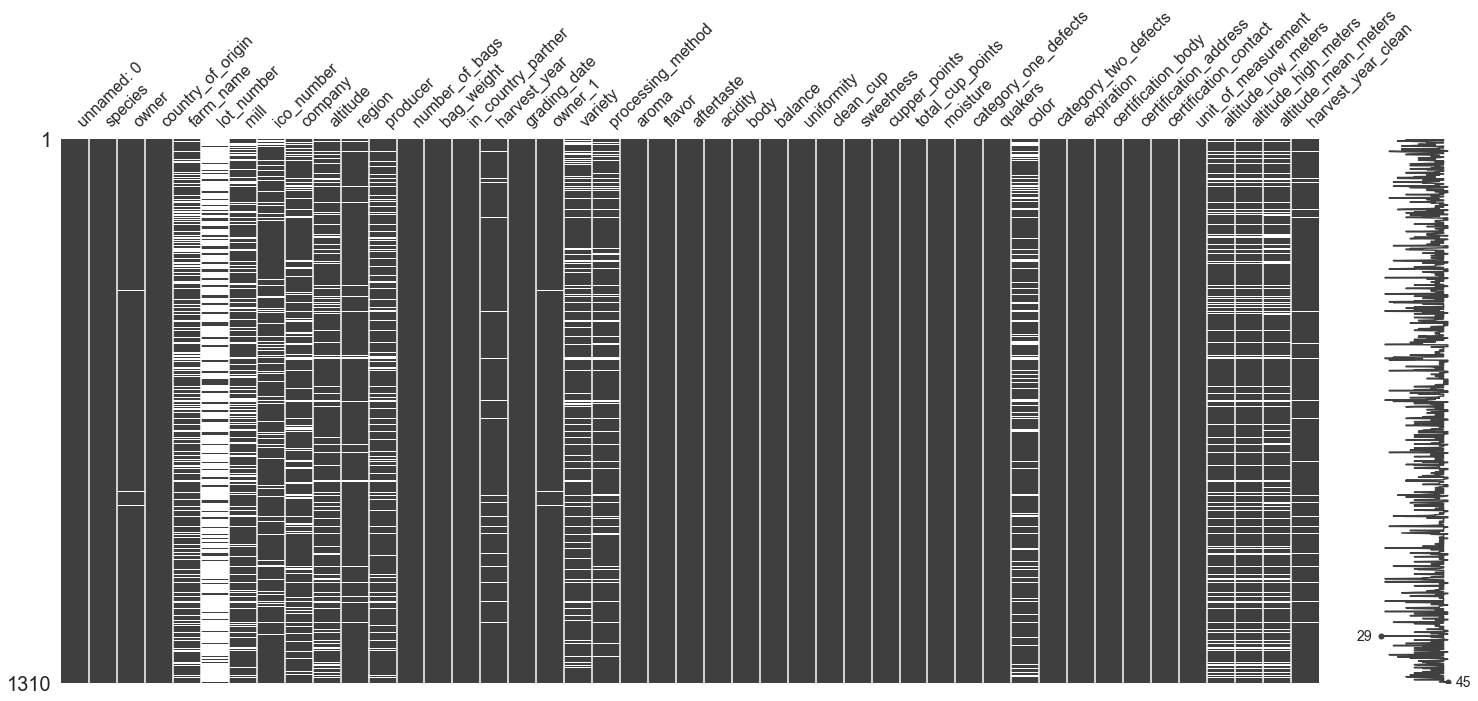

In [206]:
#matrix plot to show which columns have missing values
msno.matrix(df_clean)

<AxesSubplot:>

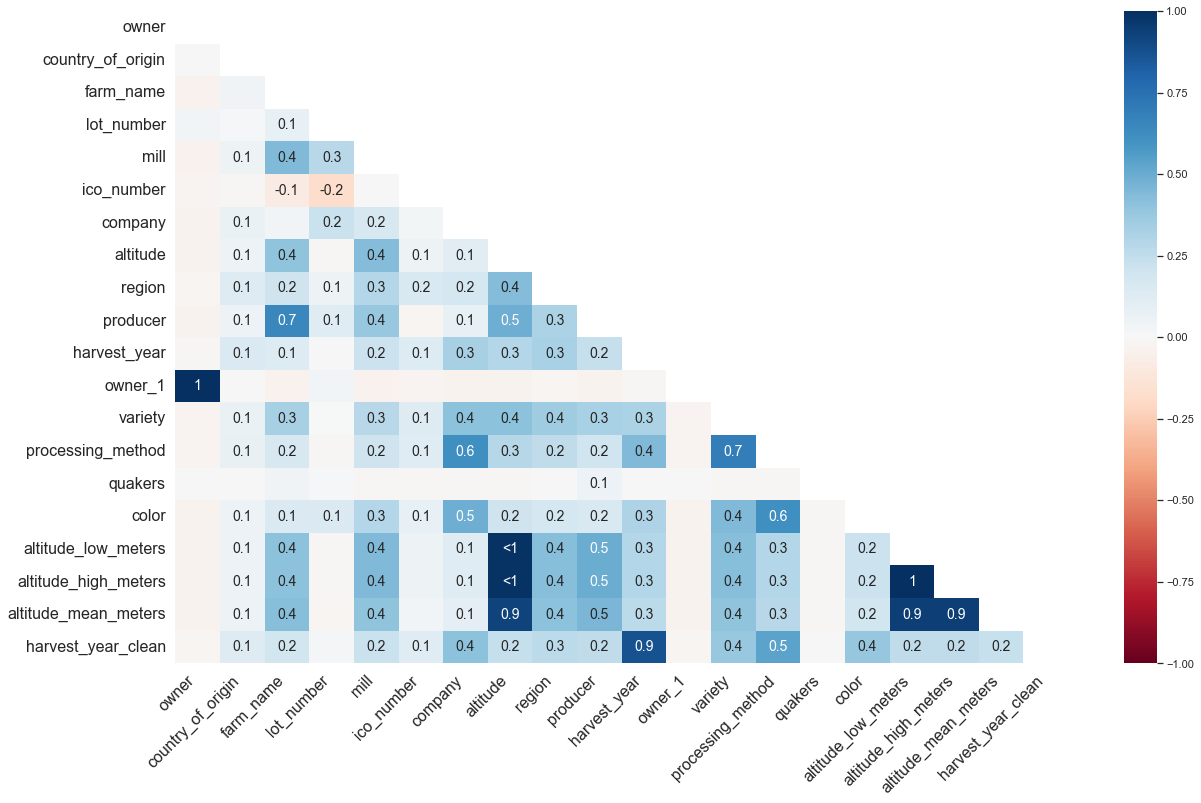

In [207]:
#heatmap to identify correlations of the nullity between columns
msno.heatmap(df_clean)

In [208]:
df_clean.isnull().sum()

unnamed: 0                  0
species                     0
owner                       7
country_of_origin           1
farm_name                 356
lot_number               1041
mill                      310
ico_number                146
company                   209
altitude                  223
region                     57
producer                  230
number_of_bags              0
bag_weight                  0
in_country_partner          0
harvest_year               47
grading_date                0
owner_1                     7
variety                   201
processing_method         151
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean_cup                   0
sweetness                   0
cupper_points               0
total_cup_points            0
moisture                    0
category_one_defects        0
quakers   

#### Country

In [209]:
#replace null value with the mode based on 'owner' column
df_clean['country_of_origin']=df_clean['country_of_origin'].fillna(df_clean.groupby('owner_1')['country_of_origin'].transform(lambda x:choice(x.mode())))

#### Quakers

In [210]:
#replace null value with 0
df_clean['quakers'].fillna(0, inplace=True)

#### Altitude

In [211]:
#replace mean altitude null value with farm average
df_clean['altitude_mean_meters']=df_clean['altitude_mean_meters'].fillna(df_clean.groupby('farm_name')['altitude_mean_meters'].transform(lambda x:x.mean()))

In [212]:
#replace remaining mean altitude null value with region average
df_clean['altitude_mean_meters']=df_clean['altitude_mean_meters'].fillna(df_clean.groupby('region')['altitude_mean_meters'].transform(lambda x:x.mean()))

In [213]:
#replace remaining mean altitude null value with country average
df_clean['altitude_mean_meters']=df_clean['altitude_mean_meters'].fillna(df_clean.groupby('country_of_origin')['altitude_mean_meters'].transform(lambda x:x.mean()))

#### Harvest year

In [214]:
#check what proportion of coffees were graded and harvested in same year
mask = df_clean['harvest_year'] == df_clean['grading_date'].str[-4:]
mask.value_counts(normalize=True)

True    0.60840
False   0.39160
dtype: float64

In [215]:
#replace null harvest year with grading year
df_clean['harvest_year_clean'].fillna(df_clean['grading_date'].str[-4:], inplace=True)

#### Region

In [216]:
#replace null value with the mode based on 'country'
df_clean['region']=df_clean['region'].fillna(df_clean.groupby('country_of_origin')['region'].transform(lambda x:choice(x.mode())))

#### Variety

In [217]:
df_clean[df_clean['variety'].isnull()]

unnamed: 0  species                                              owner  \
0              1  Arabica                                          metad plc   
3              4  Arabica                                yidnekachew dabessa   
5              6  Arabica                                          ji-ae ahn   
7              8  Arabica                        ethiopia commodity exchange   
8              9  Arabica                        ethiopia commodity exchange   
10            11  Arabica                                      mohammed lalo   
13            14  Arabica                           grounds for health admin   
14            15  Arabica                        ethiopia commodity exchange   
16            17  Arabica                           grounds for health admin   
17            18  Arabica                        ethiopia commodity exchange   
24            25  Arabica                                          ji-ae ahn   
26            27  Arabica                        ethiopia commodity exchange   
30            31  Arabica                                          nora zeas   
31            32  Arabica                             specialty coffee-korea   
34            35  Arabica                                     hider abamecha   
37            38  Arabica                   kona pacific farmers cooperative   
38            39  Arabica                        ethiopia commodity exchange   
46            47  Arabica                          great lakes coffee uganda   
50            51  Arabica                        ethiopia commodity exchange   
51            52  Arabica                           grounds for health admin   
56            57  Arabica  ibrahim hussien speciality coffee producer &ex...   
60            61  Arabica                                        dane loraas   
61            62  Arabica                          colbran coffeelands, ltd.   
70            71  Arabica                       assefa belay coffee producer   
74            75  Arabica                           grounds for health admin   
81            82  Arabica                        ethiopia commodity exchange   
90            91  Arabica                                         steven kil   
93            94  Arabica                   kona pacific farmers cooperative   
94            95  Arabica                        ethiopia commodity exchange   
95            96  Arabica                   kona pacific farmers cooperative   
100          101  Arabica                                      simon mahinda   
104          105  Arabica                   kona pacific farmers cooperative   
105          106  Arabica                                        carl walker   
114          115  Arabica                                     brian speckman   
118          119  Arabica                        ethiopia commodity exchange   
119          120  Arabica                                    philip schluter   
123          124  Arabica                             the coffee source inc.   
124          125  Arabica                           grounds for health admin   
134          135  Arabica                                         rob tuttle   
142          143  Arabica                                 benjamin schmerler   
143          144  Arabica                        ethiopia commodity exchange   
169          170  Arabica                                 daniel friedlander   
170          171  Arabica                           alexandra katona-carroll   
178          179  Arabica                        ethiopia commodity exchange   
183          184  Arabica                                 racafe & cia s.c.a   
188          189  Arabica                                           nucoffee   
189          190  Arabica                                 benjamin schmerler   
190          191  Arabica                             the coffee source inc.   
223          224  Arabica                                        chris finch   
240   

#### Variety, Processing method, Color, Owner

In [218]:
#replace null value with existing generic categories
df_clean['processing_method'].fillna('Other', inplace=True)
df_clean['color'].fillna('None', inplace=True)
df_clean['variety'].fillna('Other', inplace=True)
df_clean['owner'].fillna('Other', inplace=True)

### Drop invalid rows

In [219]:
#Remove row with null mean altitude
df_clean.dropna(subset=['altitude_mean_meters'], inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

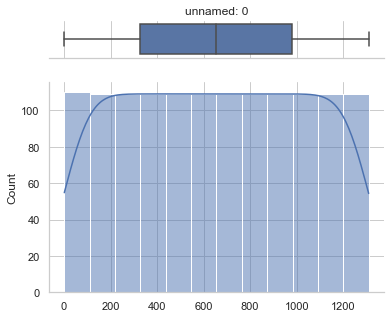

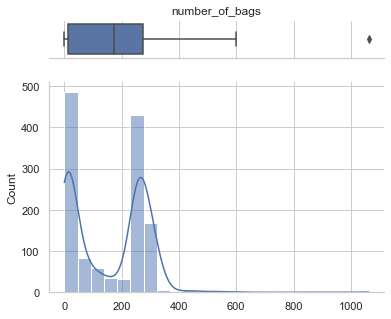

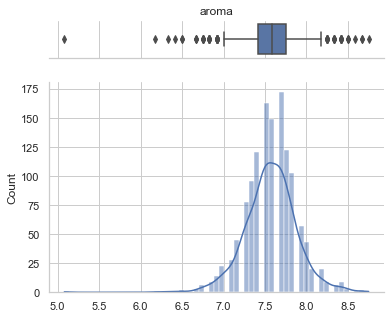

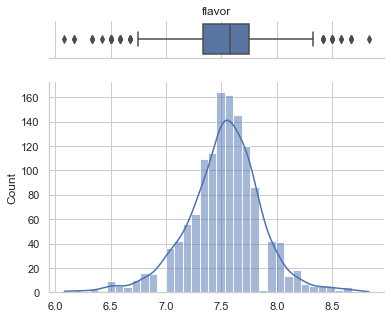

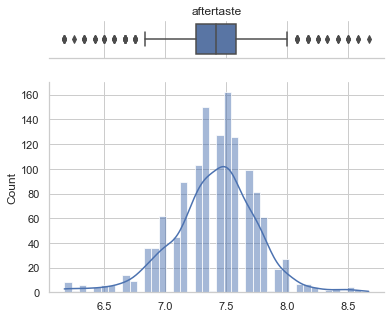

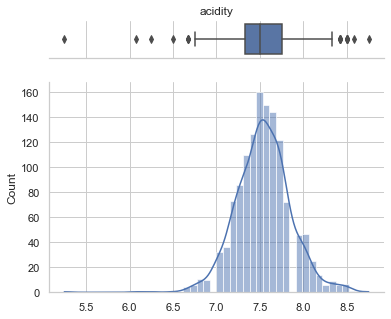

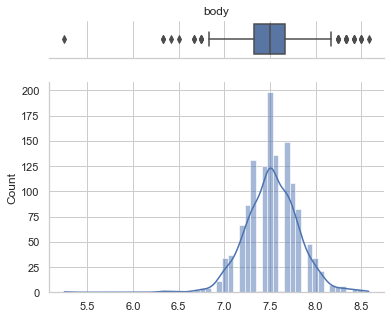

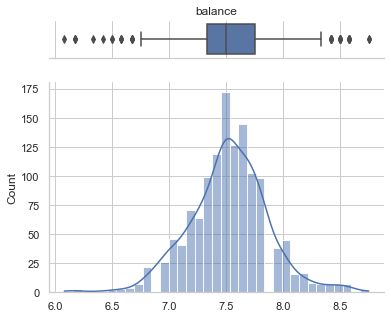

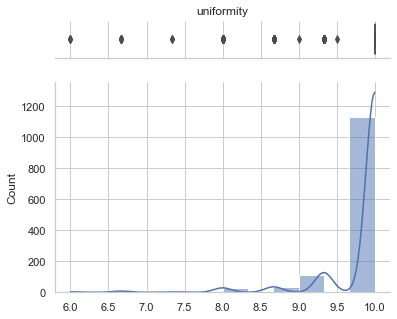

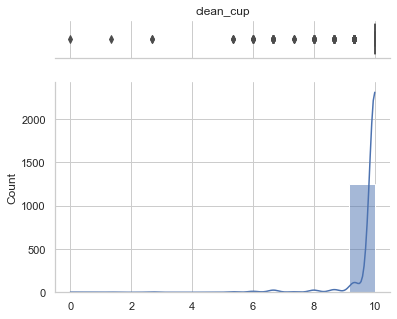

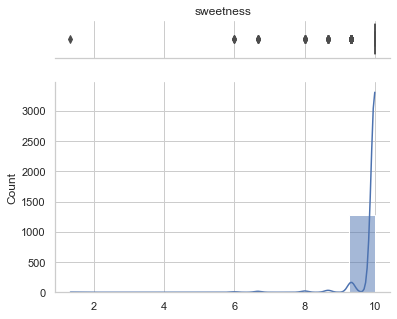

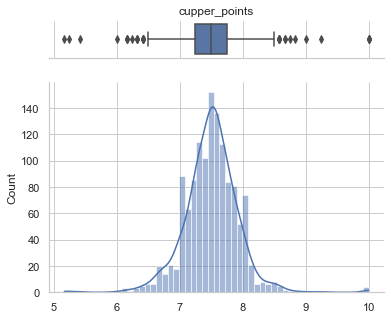

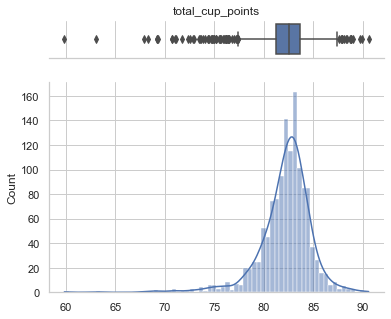

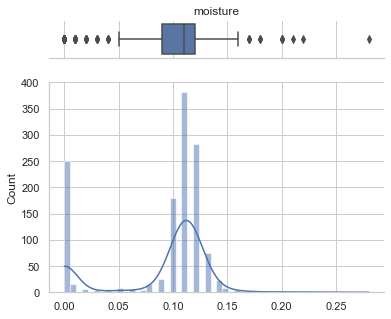

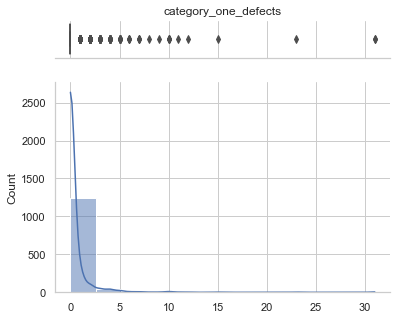

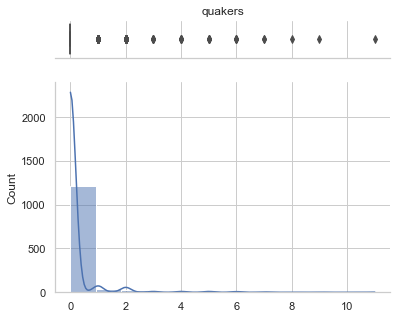

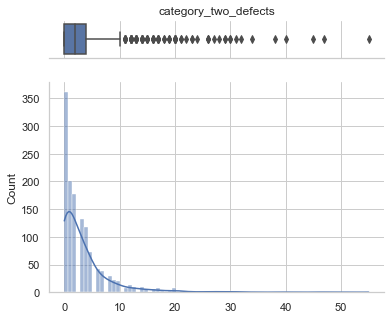

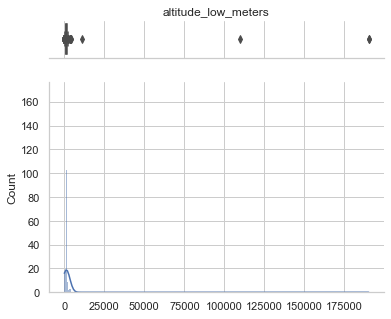

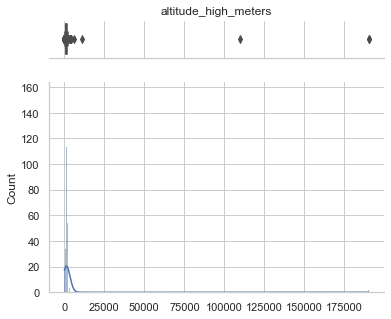

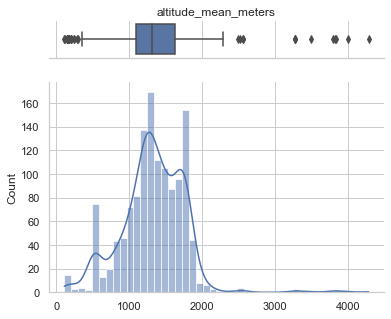

In [220]:
#Check for outliers

df_clean_num = df_clean.select_dtypes(include = ['float64', 'int64'])


for c in df_clean_num.columns: 
    fig, ax = plt.subplots(2, figsize=(6,5), sharex=True, gridspec_kw = {'height_ratios': (0.15, 0.85)})
    ax_box = ax[0]
    ax_box = sns.boxplot(x=df_clean_num[c], ax=ax_box)
    ax_box.set(title=c, yticks=[], xlabel='')
    sns.despine(ax=ax_box, left=True)

    ax_hist = ax[1]
    ax_hist = sns.histplot(x=df_clean_num[c], ax=ax_hist, kde=True)
    ax_hist.set(xlabel='')
    sns.despine(ax=ax_hist)

plt.show

## Feature engineering

### Altitude levels

In [221]:
#group mean altitude into low, mid, high

def alt_group(x):
    if x >= 1700:
        new_col = 'very high'
    elif x >= 1300 and x < 1700:
        new_col = 'high'
    elif x >= 900 and x < 1300:
        new_col = 'mid'
    elif x >= 400 and x < 900:
        new_col = 'low'
    else:
        new_col = 'very low'
    return new_col

df_clean['altitude_level'] = df_clean['altitude_mean_meters'].apply(alt_group)

### Log normalization

In [222]:
df_clean.select_dtypes(include = ['number', 'boolean']).var()

unnamed: 0               142946.40456
number_of_bags            16831.65771
aroma                         0.09983
flavor                        0.11695
aftertaste                    0.12246
acidity                       0.10184
body                          0.08589
balance                       0.12210
uniformity                    0.23916
clean_cup                     0.52189
sweetness                     0.19914
cupper_points                 0.18258
total_cup_points              7.19843
moisture                      0.00230
category_one_defects          3.36260
quakers                       0.67150
category_two_defects         28.65842
altitude_low_meters    76946074.97027
altitude_high_meters   76934460.42562
altitude_mean_meters     195197.30582
dtype: float64

In [223]:
df_clean['altitude_mean_meters_log'] = np.log(df_clean['altitude_mean_meters'])

### Moisture levels

In [224]:
#group moisture

def moisture_group(x):
    if x > 0.125:
        new_col = '>12.5%'
    elif x >= 0.08 and x <= 0.125:
        new_col = '8% -12.5%'            
    else:
        new_col = '<8%'
    return new_col

df_clean['moisture_level'] = df_clean['moisture'].apply(moisture_group)

In [225]:
df_clean.moisture_level.value_counts()

8% -12.5%    886
<8%          301
>12.5%       122
Name: moisture_level, dtype: int64

### ICP = Owner

In [226]:
#identify whether icp is the same as the owner
df_clean['icp=owner'] = df_clean['in_country_partner']==df_clean['owner_1']

In [227]:
df_clean['icp=owner'].value_counts()

False    1244
True       65
Name: icp=owner, dtype: int64

### Country

In [228]:
df_clean['country_of_origin'].value_counts()

Mexico                          236
Colombia                        190
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         52
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Thailand                         32
Uganda                           26
Nicaragua                        26
Kenya                            25
Indonesia                        21
El Salvador                      21
China                            16
Malawi                           11
Peru                             10
Myanmar                           8
Vietnam                           7
Haiti                             6
Philippines                       5
Panama                            4
United States (Puerto Rico)       4
Laos                              3
Burundi                           2
Ecuador                     

In [229]:
#group regions with <25 rows to 'Other'
df_clean['country_of_origin'] = df_clean['country_of_origin'].apply(lambda x: 'Other' if df_clean['country_of_origin'].value_counts()[x] < 25 else x)

### Variety

In [230]:
df_clean['variety'].value_counts()

Other                    308
Caturra                  255
Bourbon                  226
Typica                   211
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                33
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
SL34                       8
Pacamara                   8
Arusha                     5
Peaberry                   5
Sumatra                    3
Mandheling                 3
Ruiru 11                   2
Blue Mountain              2
Ethiopian Yirgacheffe      2
Java                       2
Ethiopian Heirlooms        1
Moka Peaberry              1
Sulawesi                   1
Sumatra Lintong            1
Marigojipe                 1
Pache Comun                1
Name: variety, dtype: int64

In [231]:
#group regions with <20 rows to 'Other'
df_clean['variety'] = df_clean['variety'].apply(lambda x: 'Other' if df_clean['variety'].value_counts()[x] < 20 else x)

### in_country_partner

In [232]:
df_clean['in_country_partner'].value_counts()

Specialty Coffee Association                                                             294
AMECAFE                                                                                  205
ALMACAFE                                                                                 178
Asociacion Nacional Del Café                                                             155
Brazil Specialty Coffee Association                                                       67
Instituto Hondureño del Café                                                              59
Blossom Valley International                                                              58
Africa Fine Coffee Association                                                            49
Specialty Coffee Association of Costa Rica                                                43
NUCOFFEE                                                                                  36
Uganda Coffee Development Authority                                   

In [233]:
df_clean['in_country_partner'] = df_clean['in_country_partner'].replace('Blossom Valley International\n', 'Blossom Valley International')

In [234]:
#group icp with <15 rows to 'Other'
df_clean['in_country_partner'] = df_clean['in_country_partner'].apply(lambda x: 'Other' if df_clean['in_country_partner'].value_counts()[x] < 15 else x)

### Region

In [235]:
df_clean['region'].value_counts()

huila                                               124
oriente                                              86
sul de minas                                         78
kona                                                 73
chiapas                                              56
veracruz                                             36
chiangrai                                            31
san marcos                                           21
tarrazu                                              21
nantou                                               21
comayagua                                            20
cerrado                                              19
coatepec                                             17
jinotega                                             17
arusha                                               17
huehuetenango                                        16
marcala                                              15
antigua                                         

In [236]:
#group regions with <3 row to 'Other'
df_clean['region'] = df_clean['region'].apply(lambda x: 'Other' if df_clean['region'].value_counts()[x] < 3 else x)

### Category One defects

In [237]:
#split number of category 1 defects into groups
# Per SCA, to be considered specialty grade, green coffee shall have zero cat1 defects and five or less cat2 defects

def cat_one_defect(x):
    if x == 0:
        new_col = '0'
    elif x >= 1 and x <= 3:
        new_col = '1-3'
    else:
        new_col = '>3'
    return new_col

df_clean['cat1_defect_level'] = df_clean['category_one_defects'].apply(cat_one_defect)

### Category two defects

In [238]:
#split number of category 2 defects into groups
# Per SCA, to be considered specialty grade, green coffee shall have zero cat1 defects and five or less cat2 defects

def cat_two_defect(x):
    if x >= 0 and x <= 2:
        new_col = '0-2'
    elif x >2 and x <=5:
        new_col = '3-5'
    elif x >5 and x <=10:
        new_col = '6-10'
    else:
        new_col = '>10'
    return new_col

df_clean['cat2_defect_level'] = df_clean['category_two_defects'].apply(cat_two_defect)

### Quality classification

In [239]:
def quality_class(x):
    if x['total_cup_points'] >= 83 and x['category_one_defects'] == 0 and x['category_two_defects'] < 5 and x['quakers'] == 0:
        new_col = '83 and above'
    elif x['total_cup_points'] >= 80 and x['total_cup_points'] < 83 and x['category_one_defects'] == 0 and x['category_two_defects'] < 5 and x['quakers'] == 0:
        new_col = '80-82'
#    elif x['total_cup_points'] >= 80 and x['total_cup_points'] < 82 and x['category_one_defects'] == 0 and x['category_two_defects'] < 5 and x['quakers'] == 0:
#        new_col = '80-81'
    else:
        new_col = 'Not Specialty'
    return new_col

df_clean['quality_classification'] = df_clean.apply(quality_class, axis=1)

[Text(0.5, 0, ''), Text(0, 0.5, 'Count')]

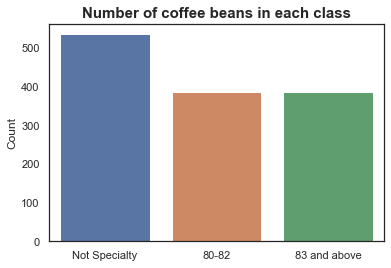

In [240]:
sns.set_style('white') 
g= sns.countplot(x='quality_classification', data=df_clean, order=['Not Specialty', '80-82', '83 and above'])
plt.title('Number of coffee beans in each class', weight='bold').set_fontsize('15')
g.set(xlabel='', ylabel='Count') 

In [241]:
np.round(df_clean['quality_classification'].value_counts(normalize=True),2)

Not Specialty   0.41000
80-82           0.30000
83 and above    0.29000
Name: quality_classification, dtype: float64

## EDA

In [242]:
df_eda = df_clean.copy()

### Drop unwanted columns

In [243]:
#assign unwanted columns to a list. Assign revised dataset to a new name so that original df is not impacted
dropped_col = ['unnamed: 0', 
               'species', 
               'owner', 
               'farm_name', 
               'lot_number', 
               'mill', 
               'ico_number', 
               'company', 
               'altitude', 
               'producer', 
               'number_of_bags', 
               'bag_weight', 
               'harvest_year', 
               'grading_date', 
               'owner_1', 
               'aroma', 
               'flavor', 
               'aftertaste', 
               'acidity', 
               'body', 
               'balance', 
               'uniformity', 
               'clean_cup', 
               'sweetness', 
               'cupper_points', 
               'expiration', 
               'certification_body',
               'certification_address', 
               'certification_contact', 
               'unit_of_measurement',
               'altitude_low_meters', 
               'altitude_high_meters'
               ]
               
df_eda = df_eda.drop(dropped_col, axis=1)

### Distributions

C:\Users\amandachen\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


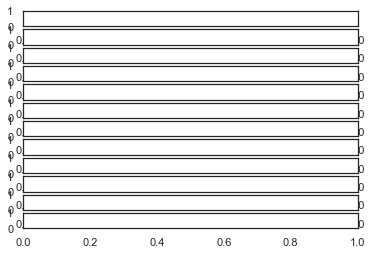

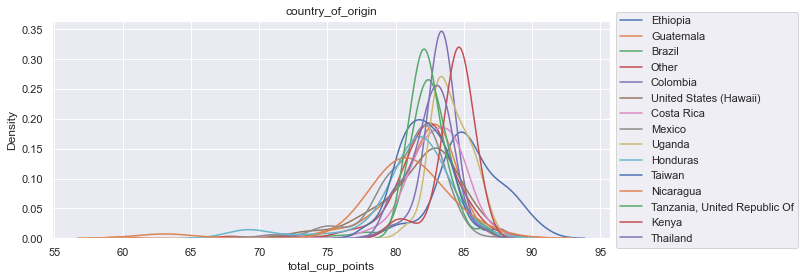

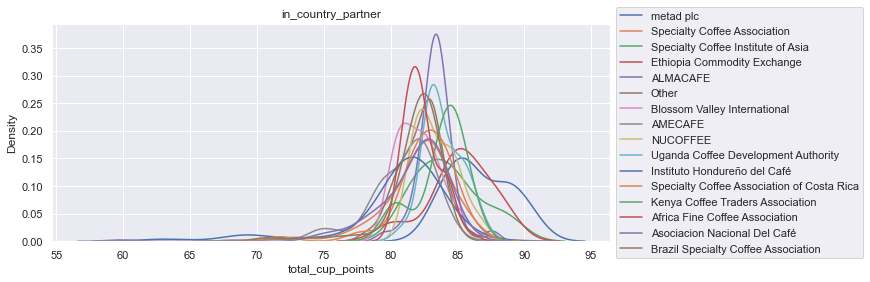

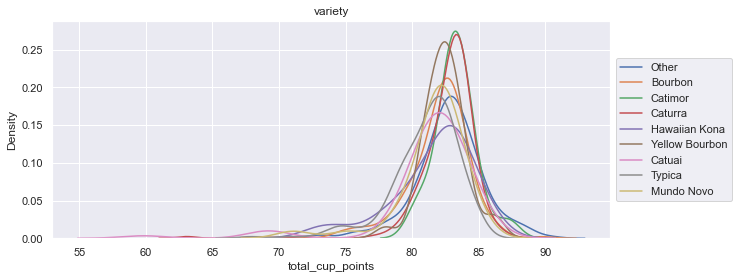

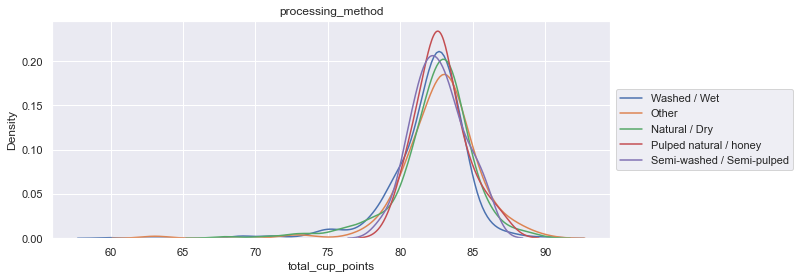

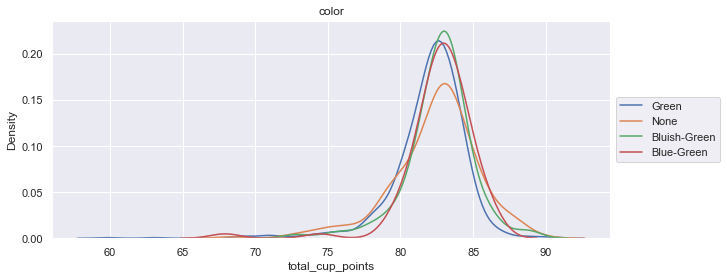

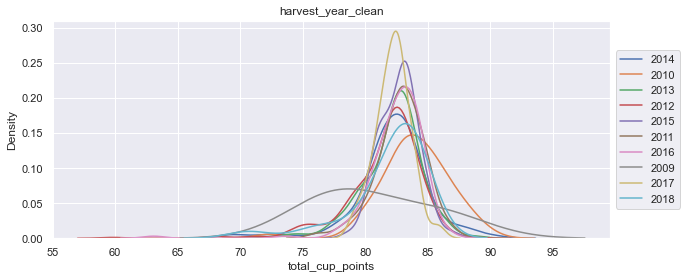

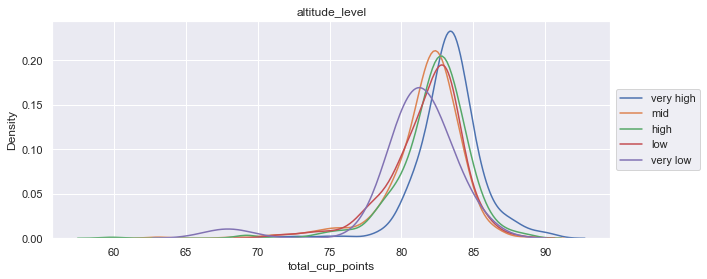

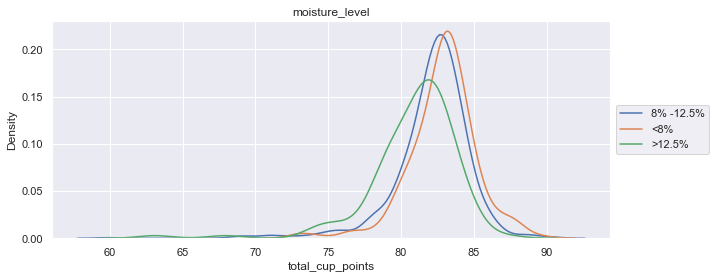

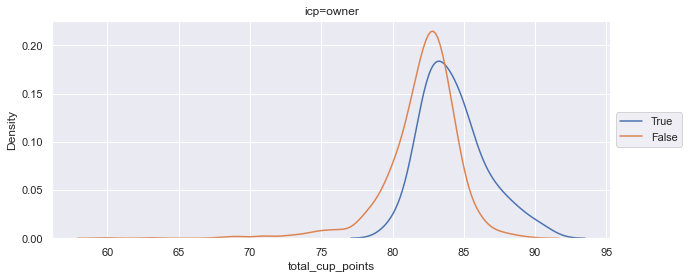

C:\Users\amandachen\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\amandachen\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\amandachen\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\amandachen\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20843 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\amandachen\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21350 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\amandachen\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarni

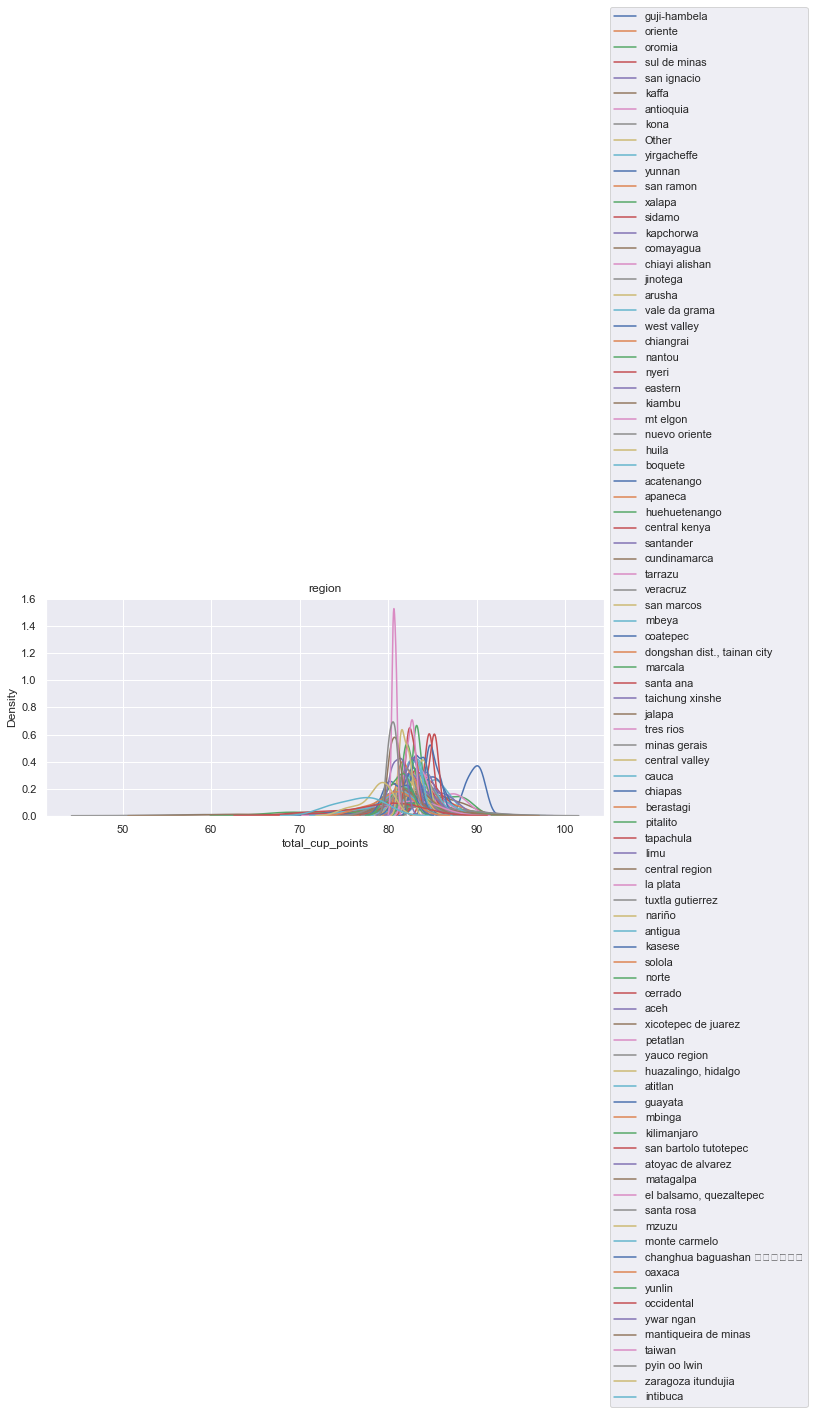

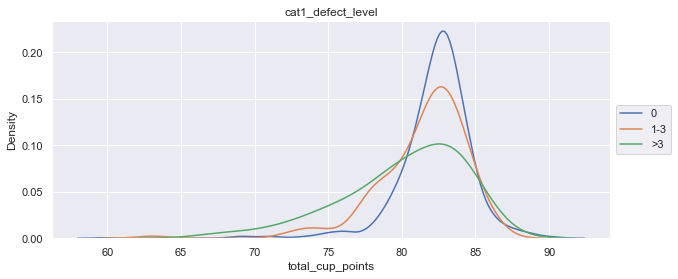

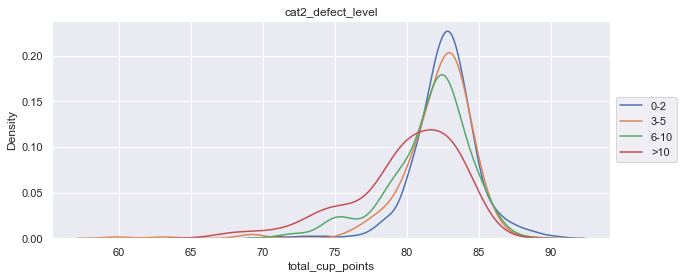

In [244]:
cols = ['country_of_origin', 'in_country_partner', 'variety', 'processing_method', 'color', 
        'harvest_year_clean', 'altitude_level', 'moisture_level', 'icp=owner', 'region', 'cat1_defect_level', 'cat2_defect_level']

fig, ax = plt.subplots(nrows=len(cols), ncols=1,  sharex=False, sharey=False)

for col in cols:
    sns.set(rc={"figure.figsize":(10, 4)})
    fig, ax = plt.subplots()
    for i in df_eda[col].unique():
        sns.kdeplot(df_eda[df_eda[col]==i]['total_cup_points'], label=i)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title(col)

### Correlation between variables

<AxesSubplot:>

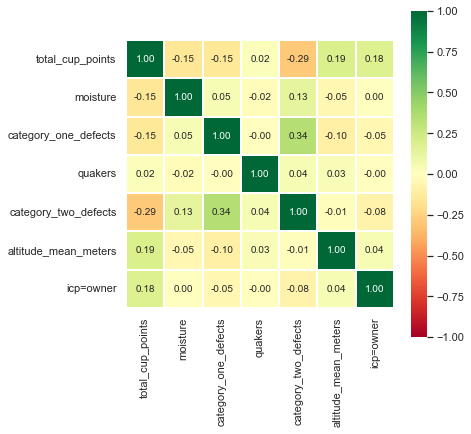

In [245]:
#correlation between features and total_cup_points
tmp = df_eda.drop('altitude_mean_meters_log', axis=1)
plt.figure(figsize=(6, 6))
mask = np.triu(np.ones_like(tmp.corr(), dtype=bool))
sns.heatmap(tmp.corr(),
            cmap='RdYlGn', fmt='.2f', vmax=1.0, vmin=-1.0, linewidth=0.1, annot=True, annot_kws={"size": 10}, square=True)

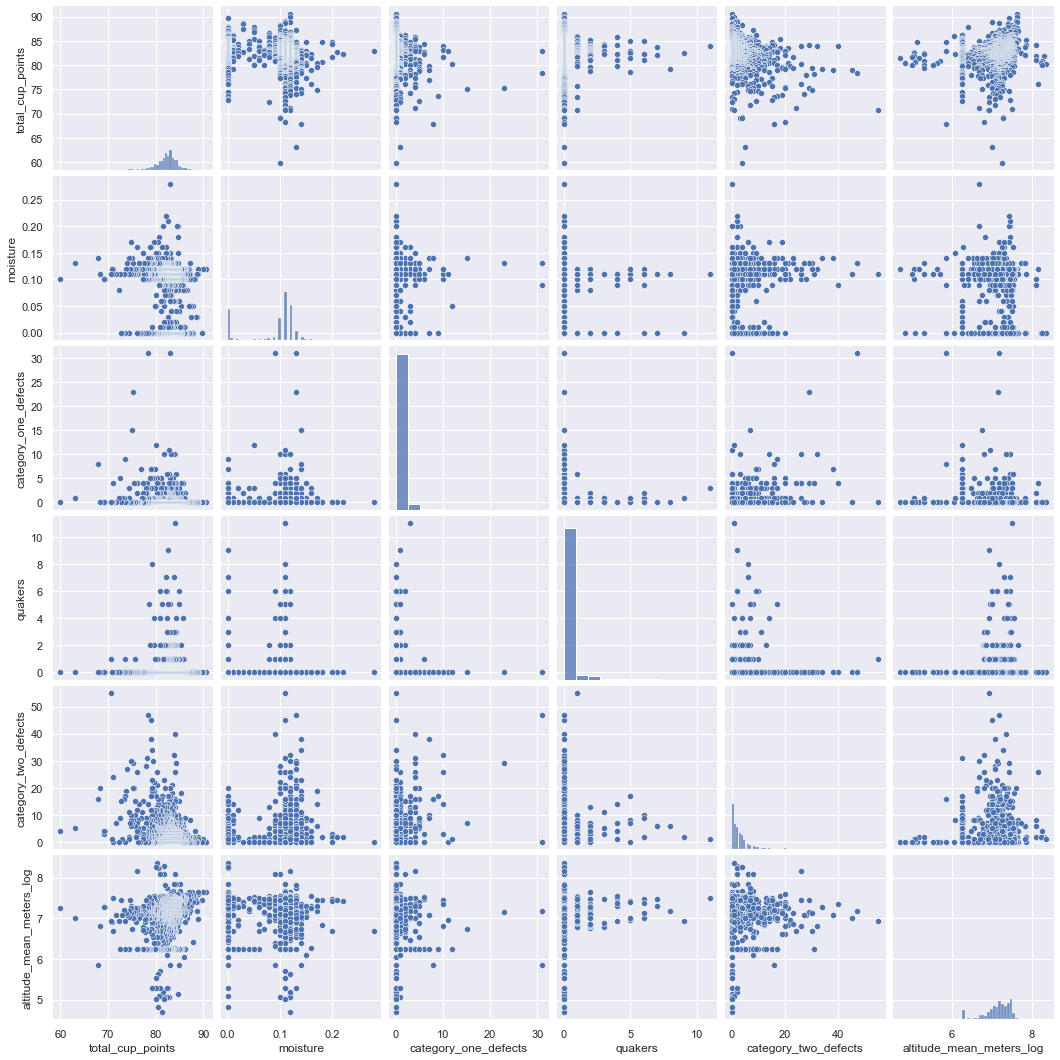

In [246]:
sns.pairplot(df_eda.select_dtypes(include = ['number']).drop('altitude_mean_meters', axis=1))

### Color

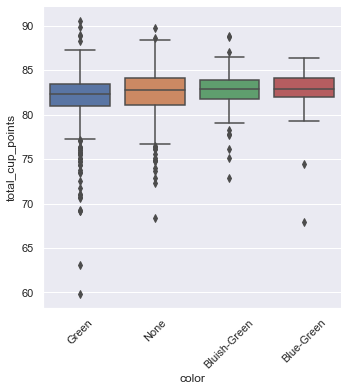

In [247]:
sns.catplot(x= 'color', 
            y='total_cup_points', 
            data=df_eda, 
            kind='box' 
            )
plt.xticks(rotation=45)
plt.show()

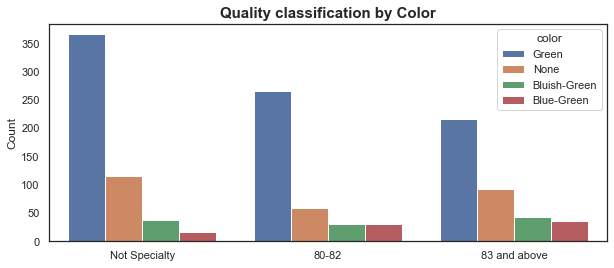

In [248]:
sns.set_style('white') 
g=sns.countplot(x='quality_classification', hue='color', data=df_eda, order=['Not Specialty', '80-82', '83 and above'])
g.set(xlabel='', ylabel='Count') 
plt.title('Quality classification by Color', weight='bold').set_fontsize('15')

### Total cup points by processing method

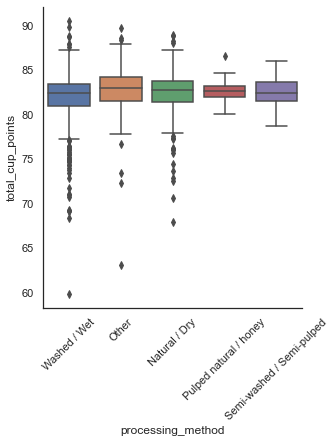

In [249]:
sns.catplot(x= 'processing_method', 
            y='total_cup_points', 
            data=df_eda, 
            kind='box' 
            )
plt.xticks(rotation=45)
plt.show()

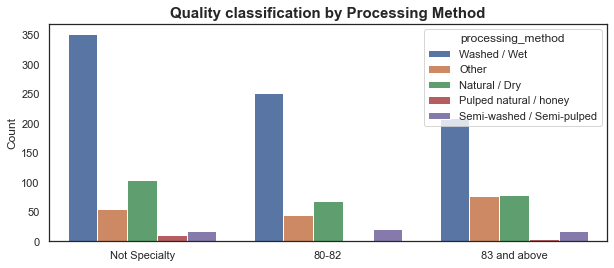

In [250]:
sns.set_style('white') 
g=sns.countplot(x='quality_classification', hue='processing_method', data=df_eda, order=['Not Specialty', '80-82', '83 and above'])
g.set(xlabel='', ylabel='Count') 
plt.title('Quality classification by Processing Method', weight='bold').set_fontsize('15')

### Altitude

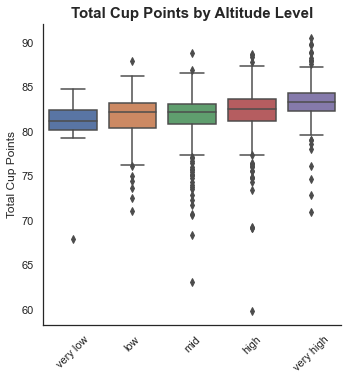

In [251]:
sns.set_style('white')
ax = sns.catplot(x= 'altitude_level', 
            y='total_cup_points', 
            data=df_eda, 
            kind='box',
            order=['very low', 'low', 'mid', 'high', 'very high']
            )
plt.xticks(rotation=45)
#ax.set_xticklabels(['very low', 'low', 'mid', 'high', 'very high'])
ax.set(xlabel='', ylabel='Total Cup Points') 
plt.title('Total Cup Points by Altitude Level', weight='bold').set_fontsize('15')

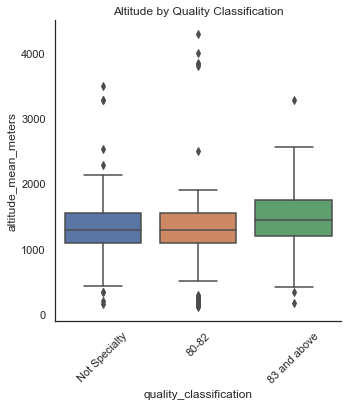

In [252]:
ax = sns.catplot(x= 'quality_classification', 
            y='altitude_mean_meters', 
            data=df_eda, 
            kind='box',
            order=['Not Specialty', '80-82', '83 and above']
            )
plt.xticks(rotation=45)
plt.title('Altitude by Quality Classification')
plt.show()

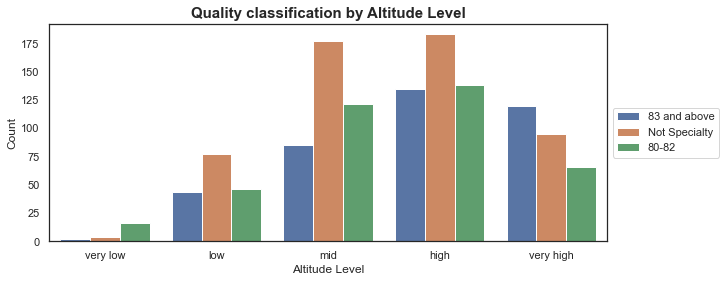

In [253]:
sns.set_style('white') 
g=sns.countplot(x='altitude_level', hue='quality_classification', data=df_eda, order=['very low', 'low', 'mid', 'high', 'very high'])
g.set(xlabel='Altitude Level', ylabel='Count') 
plt.title('Quality classification by Altitude Level', weight='bold').set_fontsize('15')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

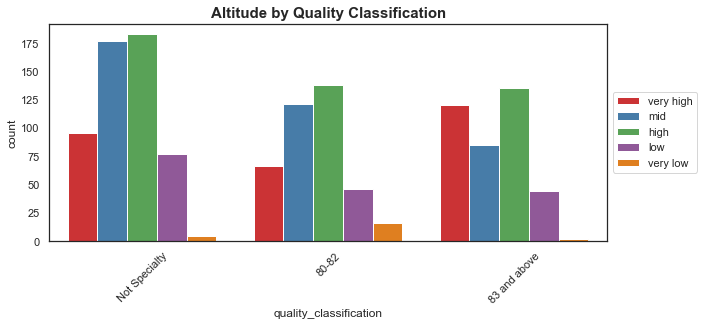

In [254]:
#shows proportion of altitude levels that make up each grade
sns.set_style('white') 
ax = sns.countplot(x= 'quality_classification', 
            hue='altitude_level', 
            data=df_eda, 
            palette='Set1',
            order=['Not Specialty', '80-82', '83 and above']
            )
plt.xticks(rotation=45)
plt.title('Altitude by Quality Classification', weight='bold').set_fontsize('15')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

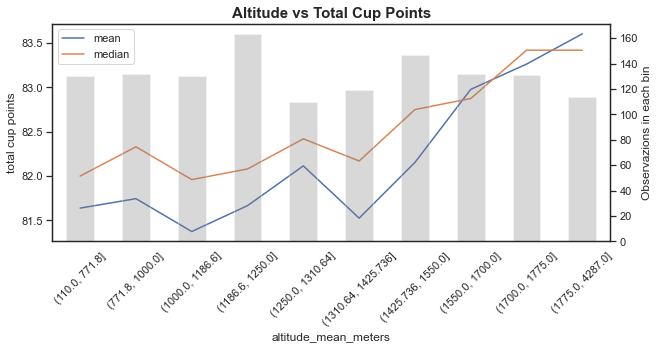

In [255]:
col = 'altitude_mean_meters'
sns.set_style('white') 
breaks = np.quantile(df_eda[col], q=np.linspace(0, 1, 11))
groups = df_eda.groupby([pd.cut(df_eda[col], bins=breaks, duplicates='drop')])['total_cup_points'].agg(['mean','median','size'])
fig, ax = plt.subplots()
#fig.suptitle(col+"   vs   total_cup_points", fontsize=20)
plt.title('Altitude vs Total Cup Points', weight='bold').set_fontsize('15')
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True, color="grey", alpha=0.3, grid=False)
ax.set(ylabel='total cup points')
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()

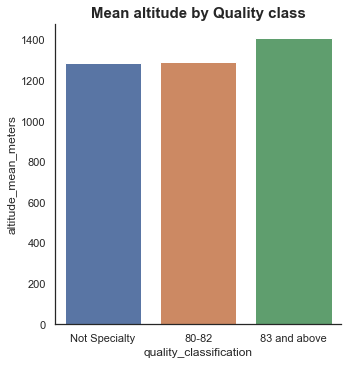

In [256]:
sns.catplot(x='quality_classification',
            y='altitude_mean_meters',
            data=df_eda, 
            kind='bar',
            order=['Not Specialty', '80-82', '83 and above'],
            ci=None
            )
plt.title('Mean altitude by Quality class', weight='bold').set_fontsize('15')

### Category one defects

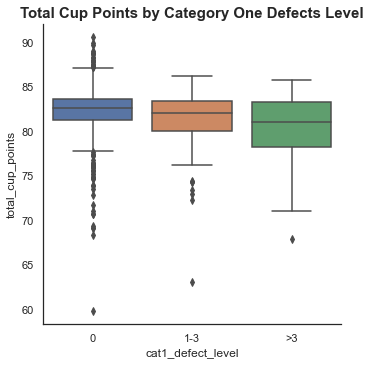

In [257]:
ax = sns.catplot(x= 'cat1_defect_level', 
            y='total_cup_points', 
            data=df_eda, 
            kind='box',
            )
plt.xticks(rotation=0)
plt.title('Total Cup Points by Category One Defects Level', weight='bold').set_fontsize('15')
plt.show()

### Category 2 defects

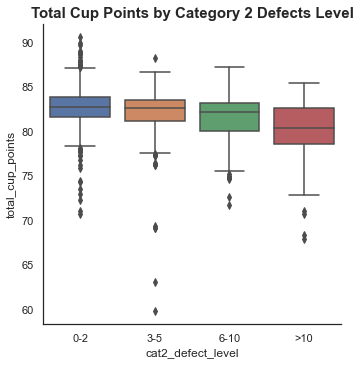

In [258]:
ax = sns.catplot(x= 'cat2_defect_level', 
            y='total_cup_points', 
            data=df_eda, 
            kind='box',
            )
plt.xticks(rotation=0)
plt.title('Total Cup Points by Category 2 Defects Level', weight='bold').set_fontsize('15')

### Country

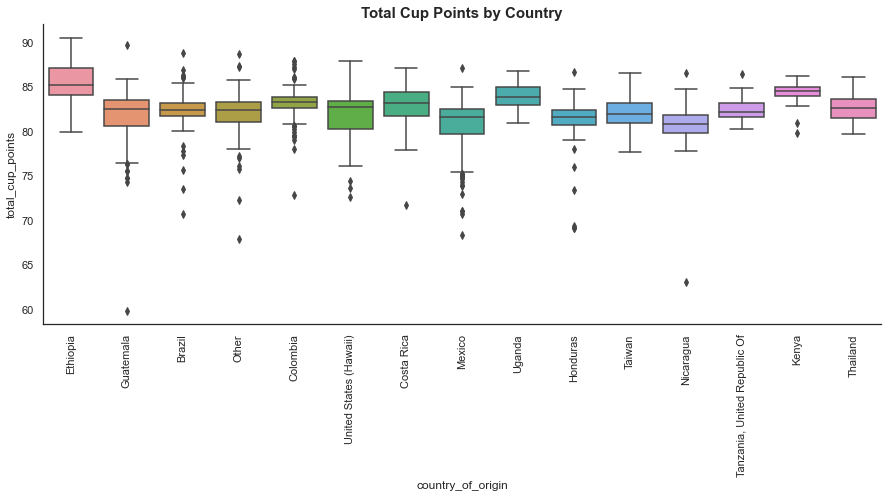

In [259]:
sns.catplot(x= 'country_of_origin', 
            y='total_cup_points', 
            data=df_eda, 
            kind='box',
            aspect=2.5
            )
plt.xticks(rotation=90)
plt.title('Total Cup Points by Country', weight='bold').set_fontsize('15')

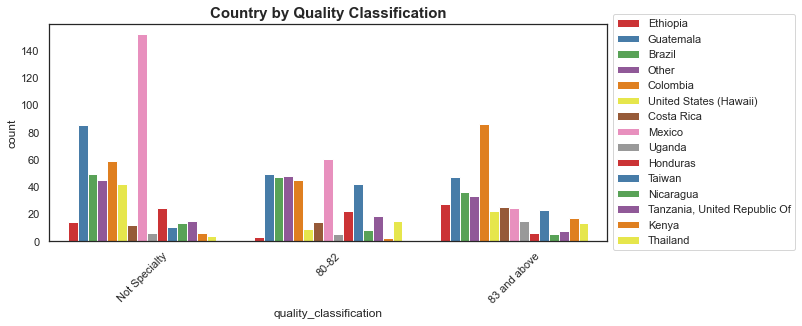

In [260]:
ax = sns.countplot(x= 'quality_classification', 
            hue='country_of_origin', 
            data=df_eda, 
            palette='Set1',
            order=['Not Specialty', '80-82', '83 and above']
            )
plt.xticks(rotation=45)
plt.title('Country by Quality Classification', weight='bold').set_fontsize('15')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Total cup points by variety

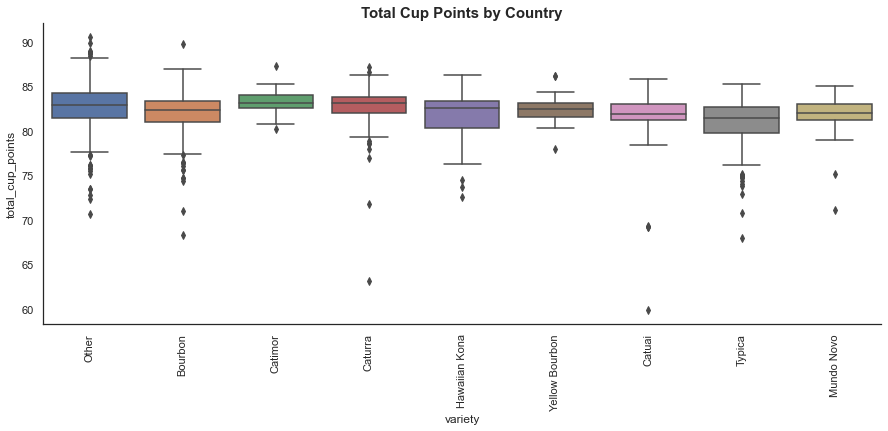

In [261]:
sns.catplot(x= 'variety', 
            y='total_cup_points', 
            data=df_eda, 
            kind='box',
            aspect=2.5
            )
plt.xticks(rotation=90)
plt.title('Total Cup Points by Country', weight='bold').set_fontsize('15')

### Moisture

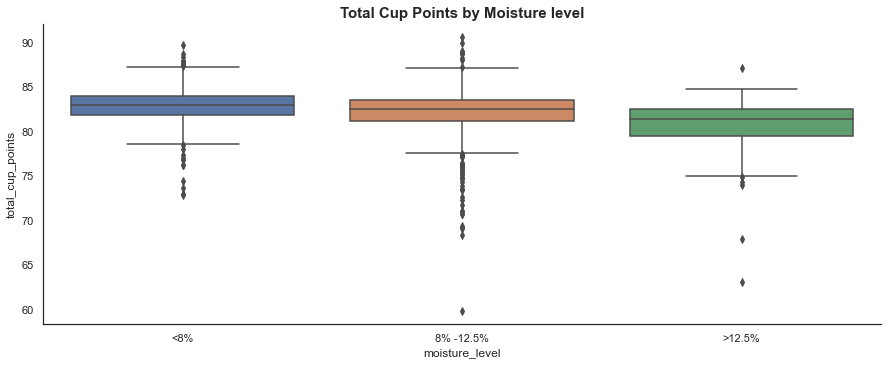

In [262]:
# distorted by 253 rows with zero moisture in dataset
sns.catplot(x= 'moisture_level', 
            y='total_cup_points', 
            data=df_eda, 
            kind='box',
            aspect=2.5,
            order=['<8%', '8% -12.5%', '>12.5%']
            )
plt.xticks(rotation=0)
plt.title('Total Cup Points by Moisture level', weight='bold').set_fontsize('15')

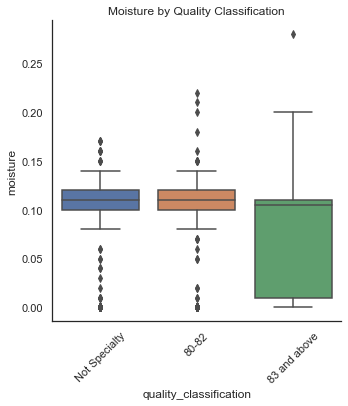

In [263]:
ax = sns.catplot(x= 'quality_classification', 
            y='moisture', 
            data=df_eda, 
            kind='box',
            order=['Not Specialty', '80-82', '83 and above']
            )
plt.xticks(rotation=45)
plt.title('Moisture by Quality Classification')
plt.show()

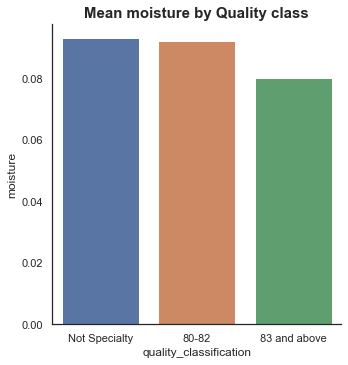

In [264]:
sns.catplot(x='quality_classification',
            y='moisture',
            data=df_eda, 
            kind='bar',
            order=['Not Specialty', '80-82', '83 and above'],
            ci=None
            )
plt.title('Mean moisture by Quality class', weight='bold').set_fontsize('15')

### Total cup points by in-country partner

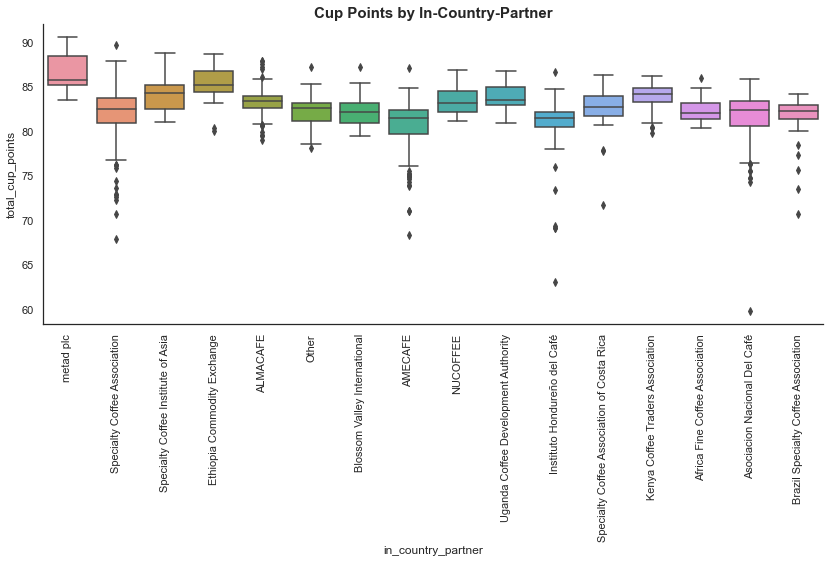

In [265]:
sns.catplot(x= 'in_country_partner', 
            y='total_cup_points', 
            data=df_eda, 
            kind='box',
            aspect=2.5
            )
plt.xticks(rotation=90)
plt.title('Cup Points by In-Country-Partner', weight='bold').set_fontsize('15')

### Boxplot for beans where in-country_partners and owner are the same

In [266]:
selected_icp = df_eda[df_eda['icp=owner']== True]['in_country_partner'].unique()
selected_icp = list(selected_icp)
selected_icp.remove('Other')

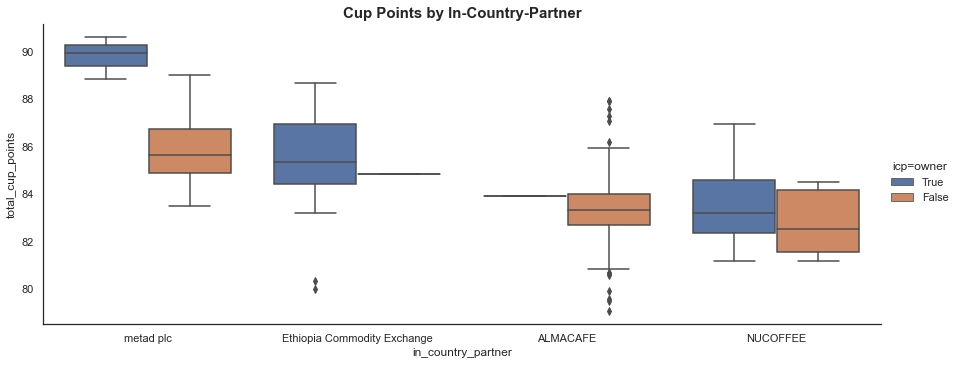

In [267]:
sns.catplot(x= 'in_country_partner', 
            y='total_cup_points', 
            data=df_eda.loc[df_eda['in_country_partner'].isin(list(selected_icp))], 
            kind='box',
            hue='icp=owner',
            hue_order=[True, False],
            aspect=2.5
            )
plt.xticks(rotation=0)
plt.title('Cup Points by In-Country-Partner', weight='bold').set_fontsize('15')

### Top 10

In [268]:
df_eda.sort_values('total_cup_points', ascending = False).loc[:, :].head(10)

country_of_origin        region                  in_country_partner  \
0          Ethiopia  guji-hambela                           metad plc   
1          Ethiopia  guji-hambela                           metad plc   
2         Guatemala       oriente        Specialty Coffee Association   
3          Ethiopia        oromia                           metad plc   
4          Ethiopia  guji-hambela                           metad plc   
5            Brazil  sul de minas  Specialty Coffee Institute of Asia   
6             Other   san ignacio  Specialty Coffee Institute of Asia   
7          Ethiopia        oromia         Ethiopia Commodity Exchange   
8          Ethiopia        oromia         Ethiopia Commodity Exchange   
9          Ethiopia         kaffa                           metad plc   

   variety processing_method  total_cup_points  moisture  \
0    Other      Washed / Wet          90.58000   0.12000   
1    Other      Washed / Wet          89.92000   0.12000   
2  Bourbon             Other          89.75000   0.00000   
3    Other     Natural / Dry          89.00000   0.11000   
4    Other      Washed / Wet          88.83000   0.12000   
5    Other     Natural / Dry          88.83000   0.11000   
6    Other      Washed / Wet          88.75000   0.11000   
7    Other             Other          88.67000   0.03000   
8    Other             Other          88.42000   0.03000   
9    Other     Natural / Dry          88.25000   0.10000   

   category_one_defects  quakers         color  category_two_defects  \
0                     0  0.00000         Green                     0   
1                     0  0.00000         Green                     1   
2                     0  0.00000          None                     0   
3                     0  0.00000         Green                     2   
4                     0  0.00000         Green                     2   
5                     0  0.00000  Bluish-Green                     1   
6                     0  0.00000  Bluish-Green                     0   
7                     0  0.00000          None                     0   
8                     0  0.00000          None                     0   
9                     0  0.00000         Green                     4   

   altitude_mean_meters harvest_year_clean altitude_level  \
0            2075.00000               2014      very high   
1            2075.00000               2014      very high   
2            1700.00000               2010      very high   
3            2000.00000               2014      very high   
4            2075.00000               2014      very high   
5            1089.92117               2013            mid   
6            1300.00000               2012           high   
7            1635.00000               2010           high   
8            1635.00000               2010           high   
9            1822.50000               2014      very high   

   altitude_mean_meters_log moisture_level  icp=owner cat1_defect_level  \
0                   7.63772      8% -12.5%       True                 0   
1                   7.63772      8% -12.5%       True                 0   
2                   7.43838            <8%      False                 0   
3                   7.60090      8% -12.5%      False                 0   
4                   7.63772      8% -12.5%       True                 0   
5                   6.99386      8% -12.5%      False                 0   
6                   7.17012      8% -12.5%      False                 0   
7                   7.39940            <8%       True                 0   
8                   7.39940            <8%       True                 0   
9                   7.50796      8% -12.5%      False                 0   

  cat2_defect_level quality_classification  
0               0-2           83 and above  
1               0-2           83 and above  
2               0-2           83 and above  
3               0-2           83 and above  
4               0-2  

In [269]:
df_eda[df_eda['quality_classification']=='84 and above'].sort_values('total_cup_points', ascending = False).loc[:, :].head(10)

Empty DataFrame
Columns: [country_of_origin, region, in_country_partner, variety, processing_method, total_cup_points, moisture, category_one_defects, quakers, color, category_two_defects, altitude_mean_meters, harvest_year_clean, altitude_level, altitude_mean_meters_log, moisture_level, icp=owner, cat1_defect_level, cat2_defect_level, quality_classification]
Index: []

### Bottom 10

In [270]:
df_eda.sort_values('total_cup_points', ascending = True).loc[:, :].head(10)

country_of_origin         region                   in_country_partner  \
1309         Guatemala  nuevo oriente         Asociacion Nacional Del Café   
1308         Nicaragua         jalapa         Instituto Hondureño del Café   
1307             Other          Other         Specialty Coffee Association   
1306            Mexico          Other                              AMECAFE   
1304          Honduras        marcala         Instituto Hondureño del Café   
1305          Honduras        marcala         Instituto Hondureño del Café   
1303          Honduras        marcala         Instituto Hondureño del Café   
1302            Brazil        cerrado  Brazil Specialty Coffee Association   
1301            Mexico        chiapas         Specialty Coffee Association   
1300            Mexico       veracruz                              AMECAFE   

      variety processing_method  total_cup_points  moisture  \
1309   Catuai      Washed / Wet          59.83000   0.10000   
1308  Caturra             Other          63.08000   0.13000   
1307   Typica     Natural / Dry          67.92000   0.14000   
1306  Bourbon      Washed / Wet          68.33000   0.11000   
1304   Catuai      Washed / Wet          69.17000   0.10000   
1305   Catuai      Washed / Wet          69.17000   0.10000   
1303   Catuai      Washed / Wet          69.33000   0.10000   
1302    Other     Natural / Dry          70.67000   0.11000   
1301   Typica      Washed / Wet          70.75000   0.12000   
1300  Bourbon      Washed / Wet          71.00000   0.11000   

      category_one_defects  quakers       color  category_two_defects  \
1309                     0  0.00000       Green                     4   
1308                     1  0.00000       Green                     5   
1307                     8  0.00000  Blue-Green                    16   
1306                     0  0.00000        None                    20   
1304                     0  0.00000       Green                     3   
1305                     0  0.00000       Green                     4   
1303                     0  0.00000       Green                     4   
1302                     0  1.00000       Green                    55   
1301                     0  0.00000       Green                     1   
1300                     0  0.00000       Green                     0   

      altitude_mean_meters harvest_year_clean altitude_level  \
1309            1417.32000               2012           high   
1308            1100.00000               2016            mid   
1307             350.00000               2012       very low   
1306             900.00000               2012            mid   
1304            1450.00000               2014           high   
1305            1450.00000               2014           high   
1303            1450.00000               2014           high   
1302            1033.55556               2018            mid   
1301            1000.00000               2014            mid   
1300            1800.00000               2012      very high   

      altitude_mean_meters_log moisture_level  icp=owner cat1_defect_level  \
1309                   7.25652      8% -12.5%      False                 0   
1308                   7.00307         >12.5%      False               1-3   
1307                   5.85793         >12.5%      False                >3   
1306                   6.80239      8% -12.5%      False                 0   
1304                   7.27932      8% -12.5%      False                 0   
1305                   7.27932      8% -12.5%      False                 0   
1303                   7.27932      8% -12.5%      False                 0   
1302                   6.94076      8% -12.5%      False                 0   
1301                   6.90776      8% -12.5%      False                 0   
1300                   7.49554      8% -12.5%      False                 0   

     cat2_defect_level quality_classification  
1309               3-5          Not 

In [271]:
df_eda[df_eda['quality_classification']=='Not Specialty'].sort_values('total_cup_points', ascending = True).loc[:, :].head(10)

country_of_origin         region                   in_country_partner  \
1309         Guatemala  nuevo oriente         Asociacion Nacional Del Café   
1308         Nicaragua         jalapa         Instituto Hondureño del Café   
1307             Other          Other         Specialty Coffee Association   
1306            Mexico          Other                              AMECAFE   
1304          Honduras        marcala         Instituto Hondureño del Café   
1305          Honduras        marcala         Instituto Hondureño del Café   
1303          Honduras        marcala         Instituto Hondureño del Café   
1302            Brazil        cerrado  Brazil Specialty Coffee Association   
1301            Mexico        chiapas         Specialty Coffee Association   
1300            Mexico       veracruz                              AMECAFE   

      variety processing_method  total_cup_points  moisture  \
1309   Catuai      Washed / Wet          59.83000   0.10000   
1308  Caturra             Other          63.08000   0.13000   
1307   Typica     Natural / Dry          67.92000   0.14000   
1306  Bourbon      Washed / Wet          68.33000   0.11000   
1304   Catuai      Washed / Wet          69.17000   0.10000   
1305   Catuai      Washed / Wet          69.17000   0.10000   
1303   Catuai      Washed / Wet          69.33000   0.10000   
1302    Other     Natural / Dry          70.67000   0.11000   
1301   Typica      Washed / Wet          70.75000   0.12000   
1300  Bourbon      Washed / Wet          71.00000   0.11000   

      category_one_defects  quakers       color  category_two_defects  \
1309                     0  0.00000       Green                     4   
1308                     1  0.00000       Green                     5   
1307                     8  0.00000  Blue-Green                    16   
1306                     0  0.00000        None                    20   
1304                     0  0.00000       Green                     3   
1305                     0  0.00000       Green                     4   
1303                     0  0.00000       Green                     4   
1302                     0  1.00000       Green                    55   
1301                     0  0.00000       Green                     1   
1300                     0  0.00000       Green                     0   

      altitude_mean_meters harvest_year_clean altitude_level  \
1309            1417.32000               2012           high   
1308            1100.00000               2016            mid   
1307             350.00000               2012       very low   
1306             900.00000               2012            mid   
1304            1450.00000               2014           high   
1305            1450.00000               2014           high   
1303            1450.00000               2014           high   
1302            1033.55556               2018            mid   
1301            1000.00000               2014            mid   
1300            1800.00000               2012      very high   

      altitude_mean_meters_log moisture_level  icp=owner cat1_defect_level  \
1309                   7.25652      8% -12.5%      False                 0   
1308                   7.00307         >12.5%      False               1-3   
1307                   5.85793         >12.5%      False                >3   
1306                   6.80239      8% -12.5%      False                 0   
1304                   7.27932      8% -12.5%      False                 0   
1305                   7.27932      8% -12.5%      False                 0   
1303                   7.27932      8% -12.5%      False                 0   
1302                   6.94076      8% -12.5%      False                 0   
1301                   6.90776      8% -12.5%      False                 0   
1300                   7.49554      8% -12.5%      False                 0   

     cat2_defect_level quality_classification  
1309               3-5          Not 

## Feature Engineering

In [272]:
df_fe = df_eda.copy()

### Encoding

In [273]:
#transform categorical columns to numerical
drop_col = ['quality_classification', 'harvest_year_clean', 'cat1_defect_level', 'cat2_defect_level']
df_fe_encoded = pd.get_dummies(data = df_fe.drop(drop_col, axis=1), drop_first=True)

In [274]:
df_fe_encoded.shape

(1309, 147)

### Scaling

In [275]:
#scale all columns except for total_cup_points and quality classification, then combine scaled features and unscaled total_cup_points back into a df

target_col = 'quality_classification'
col_to_drop = ['total_cup_points', 'altitude_mean_meters']
features = [c for c in df_fe_encoded.columns if c not in col_to_drop]

#scale features and create dataframe 
standardized_features = pd.DataFrame(StandardScaler().fit_transform(df_fe_encoded[features].copy()), columns = features)

# join scaled features with target col
df_fe_encoded_scaled = pd.concat([standardized_features.reset_index(drop=True), df_fe[target_col].reset_index(drop=True)], axis= 1)

assert df_fe_encoded.shape[1]-len(col_to_drop)+1 == df_fe_encoded_scaled.shape[1], "something went wrong!"

In [276]:
df_fe_encoded_scaled.head()

moisture  category_one_defects  quakers  category_two_defects  \
0   0.64905              -0.23297 -0.20984              -0.67196   
1   0.64905              -0.23297 -0.20984              -0.48509   
2  -1.85594              -0.23297 -0.20984              -0.67196   
3   0.44030              -0.23297 -0.20984              -0.29822   
4   0.64905              -0.23297 -0.20984              -0.29822   

   altitude_mean_meters_log  icp=owner  country_of_origin_Colombia  \
0                   1.24681    4.37475                    -0.41206   
1                   1.24681    4.37475                    -0.41206   
2                   0.76752   -0.22858                    -0.41206   
3                   1.15829   -0.22858                    -0.41206   
4                   1.24681    4.37475                    -0.41206   

   country_of_origin_Costa Rica  country_of_origin_Ethiopia  \
0                      -0.20135                     5.36190   
1                      -0.20135                     5.36190   
2                      -0.20135                    -0.18650   
3                      -0.20135                     5.36190   
4                      -0.20135                     5.36190   

   country_of_origin_Guatemala  country_of_origin_Honduras  \
0                     -0.40058                    -0.20339   
1                     -0.40058                    -0.20339   
2                      2.49641                    -0.20339   
3                     -0.40058                    -0.20339   
4                     -0.40058                    -0.20339   

   country_of_origin_Kenya  country_of_origin_Mexico  \
0                 -0.13954                  -0.46898   
1                 -0.13954                  -0.46898   
2                 -0.13954                  -0.46898   
3                 -0.13954                  -0.46898   
4                 -0.13954                  -0.46898   

   country_of_origin_Nicaragua  country_of_origin_Other  \
0                     -0.14236                 -0.32636   
1                     -0.14236                 -0.32636   
2                     -0.14236                 -0.32636   
3                     -0.14236                 -0.32636   
4                     -0.14236                 -0.32636   

   country_of_origin_Taiwan  country_of_origin_Tanzania, United Republic Of  \
0                  -0.24653                                        -0.17754   
1                  -0.24653                                        -0.17754   
2                  -0.24653                                        -0.17754   
3                  -0.24653                                        -0.17754   
4                  -0.24653                                        -0.17754   

   country_of_origin_Thailand  country_of_origin_Uganda  \
0                    -0.15830                  -0.14236   
1                    -0.15830                  -0.14236   
2                    -0.15830                  -0.14236   
3                    -0.15830                  -0.14236   
4                    -0.15830                  -0.14236   

   country_of_origin_United States (Hawaii)  region_acatenango  region_aceh  \
0                                  -0.24303           -0.04793     -0.04793   
1                                  -0.24303           -0.04793     -0.04793   
2                                  -0.24303           -0.04793     -0.04793   
3                                  -0.24303           -0.04793     -0.04793   
4                                  -0.24303           -0.04793     -0.04793   

   region_antigua  region_antioquia  region_apaneca  region_arusha  \
0        -0.10767          -0.08321        -0.10015       -0.11471   
1        -0.10767          -0.08321        -0.10015       -0.11471   
2        -0.10767          -0.08321        -0.10015       -0.11471   
3        -0.10767          -0.08321        -0.10015       -0.11471   
4        -0.10767          -0.08321        -0.10015       -0.11471   

   

### Feature Ranking

In [277]:
columns_drop = ['quality_classification']
Xrank = df_fe_encoded_scaled.drop(columns_drop, axis=1)
yrank = df_fe_encoded_scaled['quality_classification']

In [278]:
Xrank.head()

moisture  category_one_defects  quakers  category_two_defects  \
0   0.64905              -0.23297 -0.20984              -0.67196   
1   0.64905              -0.23297 -0.20984              -0.48509   
2  -1.85594              -0.23297 -0.20984              -0.67196   
3   0.44030              -0.23297 -0.20984              -0.29822   
4   0.64905              -0.23297 -0.20984              -0.29822   

   altitude_mean_meters_log  icp=owner  country_of_origin_Colombia  \
0                   1.24681    4.37475                    -0.41206   
1                   1.24681    4.37475                    -0.41206   
2                   0.76752   -0.22858                    -0.41206   
3                   1.15829   -0.22858                    -0.41206   
4                   1.24681    4.37475                    -0.41206   

   country_of_origin_Costa Rica  country_of_origin_Ethiopia  \
0                      -0.20135                     5.36190   
1                      -0.20135                     5.36190   
2                      -0.20135                    -0.18650   
3                      -0.20135                     5.36190   
4                      -0.20135                     5.36190   

   country_of_origin_Guatemala  country_of_origin_Honduras  \
0                     -0.40058                    -0.20339   
1                     -0.40058                    -0.20339   
2                      2.49641                    -0.20339   
3                     -0.40058                    -0.20339   
4                     -0.40058                    -0.20339   

   country_of_origin_Kenya  country_of_origin_Mexico  \
0                 -0.13954                  -0.46898   
1                 -0.13954                  -0.46898   
2                 -0.13954                  -0.46898   
3                 -0.13954                  -0.46898   
4                 -0.13954                  -0.46898   

   country_of_origin_Nicaragua  country_of_origin_Other  \
0                     -0.14236                 -0.32636   
1                     -0.14236                 -0.32636   
2                     -0.14236                 -0.32636   
3                     -0.14236                 -0.32636   
4                     -0.14236                 -0.32636   

   country_of_origin_Taiwan  country_of_origin_Tanzania, United Republic Of  \
0                  -0.24653                                        -0.17754   
1                  -0.24653                                        -0.17754   
2                  -0.24653                                        -0.17754   
3                  -0.24653                                        -0.17754   
4                  -0.24653                                        -0.17754   

   country_of_origin_Thailand  country_of_origin_Uganda  \
0                    -0.15830                  -0.14236   
1                    -0.15830                  -0.14236   
2                    -0.15830                  -0.14236   
3                    -0.15830                  -0.14236   
4                    -0.15830                  -0.14236   

   country_of_origin_United States (Hawaii)  region_acatenango  region_aceh  \
0                                  -0.24303           -0.04793     -0.04793   
1                                  -0.24303           -0.04793     -0.04793   
2                                  -0.24303           -0.04793     -0.04793   
3                                  -0.24303           -0.04793     -0.04793   
4                                  -0.24303           -0.04793     -0.04793   

   region_antigua  region_antioquia  region_apaneca  region_arusha  \
0        -0.10767          -0.08321        -0.10015       -0.11471   
1        -0.10767          -0.08321        -0.10015       -0.11471   
2        -0.10767          -0.08321        -0.10015       -0.11471   
3        -0.10767          -0.08321        -0.10015       -0.11471   
4        -0.10767          -0.08321        -0.10015       -0.11471   

   

##### SelectKBest

In [279]:
df_cat = df_fe.select_dtypes(exclude = ['number'])
df_cat_X = pd.get_dummies(df_cat.drop(['harvest_year_clean', 'quality_classification', 'region', 'in_country_partner', 'color', 'variety', 'processing_method'], axis=1), drop_first=True)
df_cat_y = df_cat['quality_classification'].replace(['Not Specialty', '80-82', '83 and above'], [0,1,2])

C:\Users\amandachen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


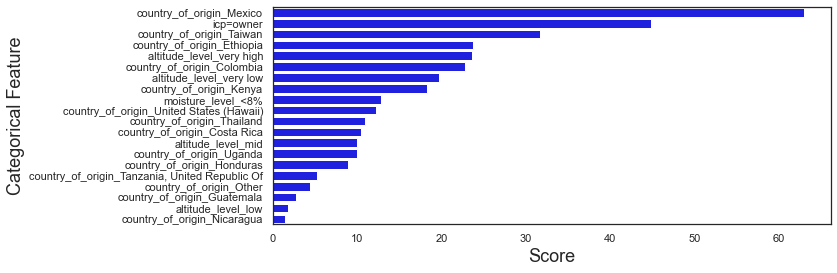

In [280]:
# plot the scores
from sklearn.feature_selection import SelectKBest, chi2
sf = SelectKBest(chi2, k=20)
sf_fit = sf.fit(df_cat_X, df_cat_y)
datset = pd.DataFrame()
datset['feature'] = df_cat_X.columns[ range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.head(20).sort_values(by='scores', ascending=False)
sns.barplot(datset['scores'], datset['feature'], color='blue')
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

##### Random Forest

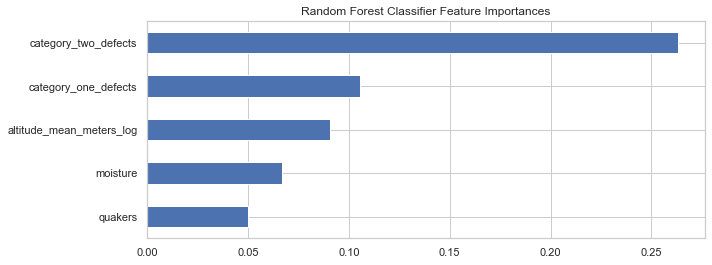

In [281]:
rank_RF = RandomForestClassifier()
rank_RF.fit(Xrank, yrank)
features_rf = pd.Series(rank_RF.feature_importances_, index=Xrank.columns)
features_rf.nlargest(5).sort_values(ascending=True).plot(kind='barh')
plt.title('Random Forest Classifier Feature Importances')
plt.show()

features_rf.nlargest(10).sort_values(ascending=False)

##### Recursive feature elimination

In [282]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select = 10, verbose=1, step=10)
rfe.fit(Xrank, yrank)
print(Xrank.columns[rfe.support_])

Fitting estimator with 145 features.
Fitting estimator with 135 features.
Fitting estimator with 125 features.
Fitting estimator with 115 features.
Fitting estimator with 105 features.
Fitting estimator with 95 features.
Fitting estimator with 85 features.
Fitting estimator with 75 features.
Fitting estimator with 65 features.
Fitting estimator with 55 features.
Fitting estimator with 45 features.
Fitting estimator with 35 features.
Fitting estimator with 25 features.
Fitting estimator with 15 features.
Index(['moisture', 'category_one_defects', 'quakers', 'category_two_defects',
       'altitude_mean_meters_log', 'country_of_origin_Mexico',
       'in_country_partner_Specialty Coffee Association', 'variety_Other',
       'processing_method_Washed / Wet', 'color_Green'],
      dtype='object')


##### Extra Trees Classifier

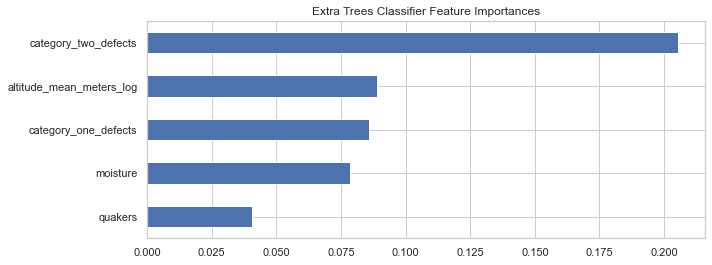

In [283]:
model = ExtraTreesClassifier()
model.fit(Xrank, yrank)
feat_importances = pd.Series(model.feature_importances_, index=Xrank.columns)
feat_importances.nlargest(5).sort_values(ascending=True).plot(kind='barh')
plt.title('Extra Trees Classifier Feature Importances')
plt.show()

## Pre-process data

In [284]:
df = df_eda.copy()

### Transform categorical columns

In [285]:
keep = [
        'country_of_origin', 
        #'region', 
        'in_country_partner', 
        'variety',
        'processing_method', 
        #'total_cup_points', 
        'moisture',
        #'category_one_defects', 
        'quakers', 
        #'color', 
        #'category_two_defects',
        #'altitude_mean_meters', 
        #'harvest_year_clean', 
        #'altitude_level',
        #'moisture_level', 
        'icp=owner', 
        'cat1_defect_level', 
        'cat2_defect_level',
        #'quality_classification', 
        'altitude_mean_meters_log', 
        ]

#transform categorical columns to numerical
df_features = pd.get_dummies(data = df[keep], drop_first=True)


In [286]:
#combine encoded df and quality_classification back into a df

target_col = 'quality_classification'

df_encoded = pd.concat([df_features.reset_index(drop=True), df[target_col].reset_index(drop=True)], axis= 1)

assert df_encoded.shape[1]-1 == df_features.shape[1], "something went wrong!"

In [287]:
columns_drop = ['quality_classification']
X = df_encoded.drop(columns_drop, axis=1)
y = df_encoded['quality_classification']

In [288]:
X.columns

Index(['moisture', 'quakers', 'icp=owner', 'altitude_mean_meters_log',
       'country_of_origin_Colombia', 'country_of_origin_Costa Rica',
       'country_of_origin_Ethiopia', 'country_of_origin_Guatemala',
       'country_of_origin_Honduras', 'country_of_origin_Kenya',
       'country_of_origin_Mexico', 'country_of_origin_Nicaragua',
       'country_of_origin_Other', 'country_of_origin_Taiwan',
       'country_of_origin_Tanzania, United Republic Of',
       'country_of_origin_Thailand', 'country_of_origin_Uganda',
       'country_of_origin_United States (Hawaii)',
       'in_country_partner_AMECAFE',
       'in_country_partner_Africa Fine Coffee Association',
       'in_country_partner_Asociacion Nacional Del Café',
       'in_country_partner_Blossom Valley International',
       'in_country_partner_Brazil Specialty Coffee Association',
       'in_country_partner_Ethiopia Commodity Exchange',
       'in_country_partner_Instituto Hondureño del Café',
       'in_country_partner_Kenya C

### Scaling

In [289]:
Xs = StandardScaler().fit_transform(X)

### PCA

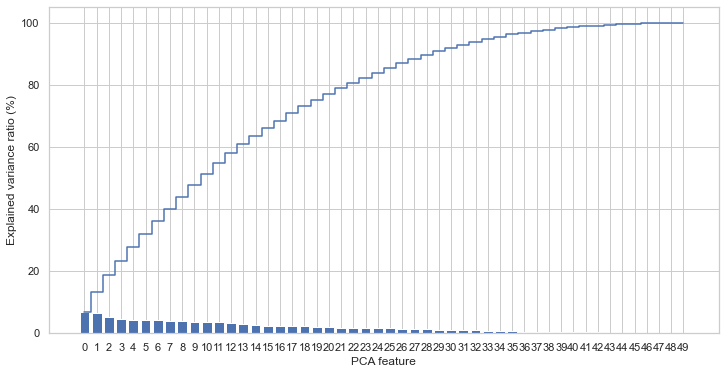

In [317]:
plt.figure(figsize=(12, 6))
pca = PCA()
pca.fit(Xs)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_*100)
plt.step(features, np.cumsum(pca.explained_variance_ratio_*100), where='mid',label='Cumulative explained variance')
plt.xticks(features)
plt.xlabel('PCA feature')
plt.ylabel('Explained variance ratio (%)')
plt.show()

In [318]:
pca2 = PCA(n_components=0.9, random_state=42)
pca2.fit(Xs)
std_x_pca = pca2.transform(Xs)

In [319]:
print('Number of components: ',pca2.n_components_)

Number of components:  30


In [320]:
df['pc1'] = std_x_pca[:,0]
df['pc2'] = std_x_pca[:,1]

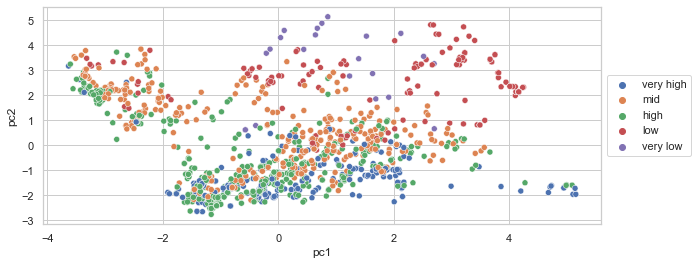

In [321]:
sns.scatterplot(x="pc1", y="pc2", hue='altitude_level', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

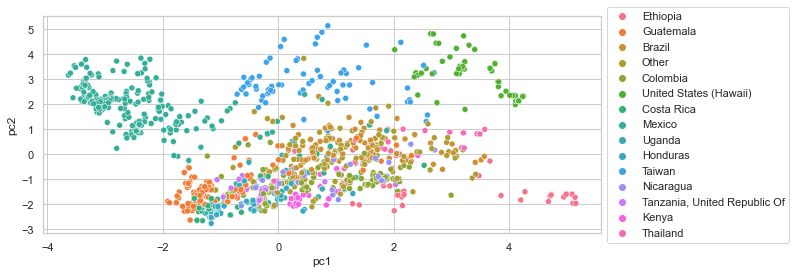

In [322]:
sns.scatterplot(x="pc1", y="pc2", hue='country_of_origin', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

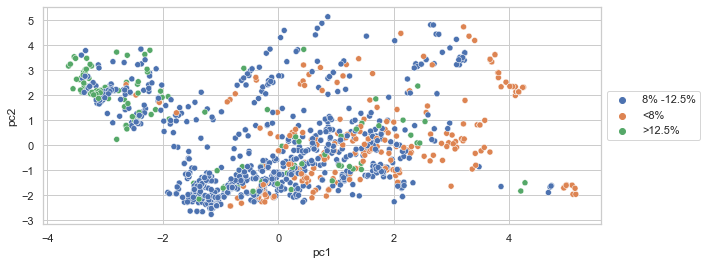

In [323]:
sns.scatterplot(x="pc1", y="pc2", hue='moisture_level', data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Modelling

In [324]:
X_train, X_test, y_train, y_test = train_test_split(std_x_pca, y, test_size=0.2, random_state=42, stratify=y)

In [325]:
models = [
          ('Logistic Regression', LogisticRegression(class_weight='balanced', random_state=42)),
          ('KNearestNeighbors', KNeighborsClassifier()),
          ('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=42)), 
          ('Random Forest Classifier', RandomForestClassifier(random_state=42, class_weight='balanced')),
          ('Bagging Classifier with Logistic Regression', BaggingClassifier(base_estimator=LogisticRegression(random_state=42), random_state=42)),
          ('Bagging Classifier with Random Forest', BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42, class_weight='balanced'), random_state=42)), 
          ('Adaboost with Random Forest', AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42, class_weight='balanced'))), 
          ('SVC', SVC(probability=True, kernel='linear', C=10, random_state=42)),
          ('Adaboost with SVC', AdaBoostClassifier(base_estimator=SVC(probability=True, random_state=42))), 
          ('Adaboost with LogReg', AdaBoostClassifier(base_estimator=LogisticRegression(random_state=42))),
          ('Adaboost with Decision Classifier', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42), random_state=42)), 
         ]

names = []
train_accuracy = []
test_accuracy = []
train_precision = []
test_precision = []
train_recall = []
test_recall = []
train_f1 = []
test_f1 = []


for name, model in models:
    model.fit(X_train, y_train)
    
    # Make predictions with training and test set
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Score training and test sets and store in list
    names.append(name)
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
    train_precision.append(precision_score(y_train, y_pred_train, average='weighted'))
    test_precision.append(precision_score(y_test, y_pred_test, average='weighted'))
    train_recall.append(recall_score(y_train, y_pred_train, average='weighted'))
    test_recall.append(recall_score(y_test, y_pred_test, average='weighted'))
    train_f1.append(f1_score(y_train, y_pred_train, average='weighted'))
    test_f1.append(f1_score(y_test, y_pred_test, average='weighted'))
    
metrics = pd.DataFrame(list(zip(train_accuracy, test_accuracy, 
                                train_precision, test_precision,
                                train_recall, test_recall,
                                train_f1, test_f1,
                               )),
                         columns = ['Train Accuracy', 'Test Accuracy', 
                                    'Train Precision', 'Test Precision',
                                    'Train Recall', 'Test Recall',
                                    'Train F1', 'Test F1',
                                   ], index=names).sort_values('Test Accuracy', ascending=False)

metrics

C:\Users\amandachen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\amandachen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Accuracy  Test Accuracy  \
Logistic Regression                                 0.71347        0.75954   
Bagging Classifier with Logistic Regression         0.71251        0.74809   
SVC                                                 0.70869        0.73664   
Adaboost with LogReg                                0.69054        0.73664   
Gradient Boosting Classifier                        0.90258        0.70611   
Bagging Classifier with Random Forest               0.91786        0.69847   
Random Forest Classifier                            0.94174        0.68321   
Adaboost with Random Forest                         0.94174        0.68321   
Adaboost with Decision Classifier                   0.93410        0.65267   
KNearestNeighbors                                   0.73257        0.59924   
Adaboost with SVC                                   0.41165        0.40840   

                                             Train Precision  Test Precision  \
Logistic Regression                                  0.73864         0.77286   
Bagging Classifier with Logistic Regression          0.71650         0.74426   
SVC                                                  0.70345         0.72838   
Adaboost with LogReg                                 0.69327         0.74315   
Gradient Boosting Classifier                         0.90506         0.69958   
Bagging Classifier with Random Forest                0.92003         0.68720   
Random Forest Classifier                             0.94315         0.66875   
Adaboost with Random Forest                          0.94315         0.67245   
Adaboost with Decision Classifier                    0.93508         0.64075   
KNearestNeighbors                                    0.75598         0.62942   
Adaboost with SVC                                    0.36512         0.16743   

                                             Train Recall  Test Recall  \
Logistic Regression                               0.71347      0.75954   
Bagging Classifier with Logistic Regression       0.71251      0.74809   
SVC                                               0.70869      0.73664   
Adaboost with LogReg                              0.69054      0.73664   
Gradient Boosting Classifier                      0.90258      0.70611   
Bagging Classifier with Random Forest             0.91786      0.69847   
Random Forest Classifier                          0.94174      0.68321   
Adaboost with Random Forest                       0.94174      0.68321   
Adaboost with Decision Classifier                 0.93410      0.65267   
KNearestNeighbors                                 0.73257      0.59924   
Adaboost with SVC                                 0.41165      0.40840   

                                             Train F1  Test F1  
Logistic Regression                           0.72195  0.76362  
Bagging Classifier with Logistic Regression   0.71345  0.74597  
SVC                                           0.70430  0.73067  
Adaboost with LogReg                          0.69178  0.73430  
Gradient Boosting Classifier                  0.90327  0.70213  
Bagging Classifier with Random Forest         0.91803  0.68890  
Random Forest Classifier                      0.94204  0.67300  
Adaboost with Random Forest                   0.94204  0.67458  
Adaboost with Decision Classifier             0.93443  0.64566  
KNearestNeighbors                             0.73806  0.60843  
Adaboost with SVC                             0.24245  0.23749

### Hyperparameter tuning

In [326]:
params = {'solver': ['liblinear', 'sag'], 'multi_class':['ovr', 'auto']}
kfold = StratifiedKFold(n_splits = 3, random_state=42, shuffle=True)
cv = GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000), param_grid=params, cv=kfold, scoring='accuracy')
cv.fit(X_train, y_train)
print("Tuned Parameter: {}".format(cv.best_params_))
print("Tuned Best Score: {}".format(cv.best_score_))

Tuned Parameter: {'multi_class': 'ovr', 'solver': 'liblinear'}
Tuned Best Score: 0.6638013371537727


### Model evaluation

In [327]:
train_accuracy = []
test_accuracy = []
train_precision = []
test_precision = []
train_recall = []
test_recall = []
train_f1 = []
test_f1 = []


final = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear', multi_class='ovr')
kfold = StratifiedKFold(n_splits = 3, random_state=42, shuffle=True)
final.fit(X_train, y_train)
final_pred_train = final.predict(X_train)
final_pred_test = final.predict(X_test)

train_accuracy.append(cross_val_score(final, X_train, y_train, cv=kfold, scoring='accuracy').mean())
test_accuracy.append(cross_val_score(final, X_test, y_test, cv=kfold, scoring='accuracy').mean())
train_precision.append(cross_val_score(final, X_train, y_train, cv=kfold, scoring='precision_weighted').mean())
test_precision.append(cross_val_score(final, X_test, y_test, cv=kfold, scoring='precision_weighted').mean())
train_recall.append(cross_val_score(final, X_train, y_train, cv=kfold, scoring='recall_weighted').mean())
test_recall.append(cross_val_score(final, X_test, y_test, cv=kfold, scoring='recall_weighted').mean())
train_f1.append(cross_val_score(final, X_train, y_train, cv=kfold, scoring='f1_weighted').mean())
test_f1.append(cross_val_score(final, X_test, y_test, cv=kfold, scoring='f1_weighted').mean())



   
    
metrics = pd.DataFrame(list(zip(train_accuracy, test_accuracy, 
                                train_precision, test_precision,
                                train_recall, test_recall,
                                train_f1, test_f1,
                               )),
                         columns = ['Train Accuracy', 'Test Accuracy', 
                                    'Train Precision', 'Test Precision',
                                    'Train Recall', 'Test Recall',
                                    'Train F1', 'Test F1',
                                   ])

metrics

Train Accuracy  Test Accuracy  Train Precision  Test Precision  \
0         0.66380        0.73267          0.69224         0.75714   

   Train Recall  Test Recall  Train F1  Test F1  
0       0.66380      0.73267   0.67119  0.73796

#### Confusion Matrix

[Text(0.5, 48.453125, 'Predicted'), Text(66.453125, 0.5, 'Actual')]

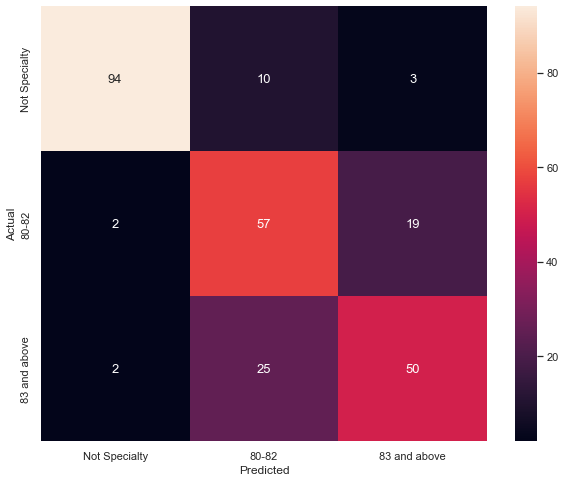

In [328]:
#confusion matrix
labels = ['Not Specialty', '80-82', '83 and above']
cm = (confusion_matrix(y_test, final_pred_test, labels=labels))

plt.figure(figsize=(10,8))
g = sns.heatmap(cm, xticklabels = labels, yticklabels = labels,annot=True, fmt='g', annot_kws={"size": 13})
g.set(xlabel='Predicted', ylabel='Actual') 

In [329]:
#accuracy for each class

def classwise_accuracy():
   a = pd.crosstab(y_test,final_pred_test)
   print(a.max(axis=1)/a.sum(axis=1))
classwise_accuracy()

quality_classification
80-82           0.73077
83 and above    0.64935
Not Specialty   0.87850
dtype: float64


#### ROC Curve

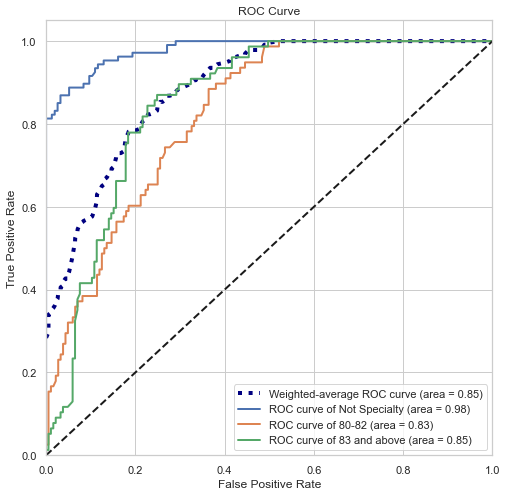

In [330]:
y2 = label_binarize(y, classes=['Not Specialty', '80-82', '83 and above'])
n_classes = y2.shape[1]

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42, stratify=y2)

classifier = OneVsRestClassifier(LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42, multi_class='ovr'))
classifier.fit(X2_train, y2_train)
y2_score = classifier.predict_proba(X2_test)

fpr = dict()
tpr = dict()
roc_auc=dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y2_test[:, i], y2_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["weighted"] = roc_auc_score(y2_test[:, i], y2_score[:, i])

map_dict = {0: 'Not Specialty', 1:'80-82', 2:'83 and above'}

# Plot all ROC curves
plt.figure(figsize=(8,8))

lw = 2

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="Weighted-average ROC curve (area = {0:0.2f})".format(roc_auc["weighted"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        lw=lw,
        label="ROC curve of {0} (area = {1:0.2f})".format(map_dict[i], roc_auc[i])
    )

    
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()

### Prediction

In [331]:
# prediction
pred_df= pd.DataFrame(data=[y_test.values, final_pred_test]).T
pred_df.columns = ['Actual', 'Prediction']
pred_df['Variance'] = pred_df['Actual'] == pred_df['Prediction']
pred_df.tail()

Actual     Prediction  Variance
257          80-82          80-82      True
258          80-82          80-82      True
259          80-82   83 and above     False
260   83 and above   83 and above      True
261  Not Specialty  Not Specialty      True